In [1]:
import torch

In [2]:
# math datasets
math_datasets = 'AddSub AQuA gsm8k MultiArith SingleEq SVAMP'

# commonsense
commonsense_datasets='boolq piqa social_i_qa hellaswag winogrande ARC-Challenge ARC-Easy openbookqa'

# sparse MoA  Router weights & threshold analysis

## sparse moA router 权重已经是经过阈值过滤的，如果要将阈值和权重一起放，应该展示未处理的权重。(已解决)

In [3]:

# math
datasets_name = math_datasets
path = '/home2/caojie/outputs/LLaMA3-1_smoe_structure/math_14k/b32_gpu2_bsg8_ep2_wep1_loral0-32_lorar8_loraQ,K,V,O,FFN_DOWN_alpha8_maxth0.5_constWFalse_noisyFalse_palayers0-32_pasize16_promptl0-0_promptl10_swi_x4_blr6e-3_maxseq300_flashatt2False_bf16True_abla_Thre/AddSub_mingen120_router_statsroute_stats.pth'

# commonsense
datasets_name = commonsense_datasets
path = '/home2/caojie/outputs/LLaMA3-1_smoe_structure/commonsense_15k/b32_epoch2_warme1_loralayers0-32_lorar8_loraQ,K,V,O,FFN_DOWN_alpha8_max_threshold0.5_bool_weightsFalse_padapter_layers0-32_padaptersize16_padapterhydraTrue_prompt_layers0-0_prompt_len10_swi_x4_blr6e-3_maxseq200_flashatt2False_bf16True_fixTh/boolq_mingen10_router_statsroute_stats.pth'


In [4]:
sparse_moa_experts = 'LoRAQ LoRAK LoRAV LoRAO LoRAUP ParallelAdapter'

In [5]:
# data = torch.load(path.replace('AddSub', 'MultiArith'))
data = torch.load(path)

/tmp/ipykernel_1655513/1021741795.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(path)


In [6]:
data

{0: {'sum_weights': tensor([1484.4766, 1505.8906, 1324.3496, 1389.2129, 1492.2188, 1120.8145],
         device='cuda:0'),
  'sum_threshold': tensor([741.2578], device='cuda:0'),
  'sum_experts': tensor(17558., device='cuda:0')},
 1: {'sum_weights': tensor([1456.9551, 1382.4180, 1320.4551, 1270.2754, 1450.7959,  591.7793],
         device='cuda:0'),
  'sum_threshold': tensor([738.2900], device='cuda:0'),
  'sum_experts': tensor(15007., device='cuda:0')},
 2: {'sum_weights': tensor([1121.8164, 1404.8203, 1292.1680, 1144.9502, 1310.7422,  550.7299],
         device='cuda:0'),
  'sum_threshold': tensor([746.4678], device='cuda:0'),
  'sum_experts': tensor(14928., device='cuda:0')},
 3: {'sum_weights': tensor([1070.5078, 1657.3281,  913.9922, 1127.6035, 1596.9688,  504.0991],
         device='cuda:0'),
  'sum_threshold': tensor([753.8193], device='cuda:0'),
  'sum_experts': tensor(14491., device='cuda:0')},
 4: {'sum_weights': tensor([1234.3398, 1239.0781, 1088.7871, 1379.9727, 1383.3301,  

In [7]:
datasets = []
for ds in datasets_name.split():
    if 'boolq' in datasets_name:
        data = torch.load(path.replace('boolq', ds))
    else:
        data = torch.load(path.replace('AddSub', ds))
    layer_weights = []
    layer_threshold = []
    layer_experts = []
    for i in range(32):
        layer = data[i]
        layer_weights.append(layer['sum_weights'])
        layer_threshold.append(layer['sum_threshold'])
        layer_experts.append(layer['sum_experts'])
    weights = torch.stack(layer_weights) / data['token_num']
    threshold = torch.cat(layer_threshold) / data['token_num']
    experts = torch.stack(layer_experts) / data['token_num']
    print(weights.shape)
    print(threshold.shape)
    print(experts.shape)
    datasets.append({
        'weights': weights.cpu().numpy(),
        'thresholds': threshold.cpu().numpy(),
        'experts': experts.cpu().numpy()
    }) 

torch.Size([32, 6])
torch.Size([32])
torch.Size([32])
torch.Size([32, 6])
torch.Size([32])
torch.Size([32])
torch.Size([32, 6])
torch.Size([32])
torch.Size([32])
torch.Size([32, 6])
torch.Size([32])
torch.Size([32])
torch.Size([32, 6])
torch.Size([32])
torch.Size([32])
torch.Size([32, 6])
torch.Size([32])
torch.Size([32])
torch.Size([32, 6])
torch.Size([32])
torch.Size([32])
torch.Size([32, 6])
torch.Size([32])
torch.Size([32])


/tmp/ipykernel_1655513/3918782095.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(path.replace('boolq', ds))


In [8]:
13270/50

265.4

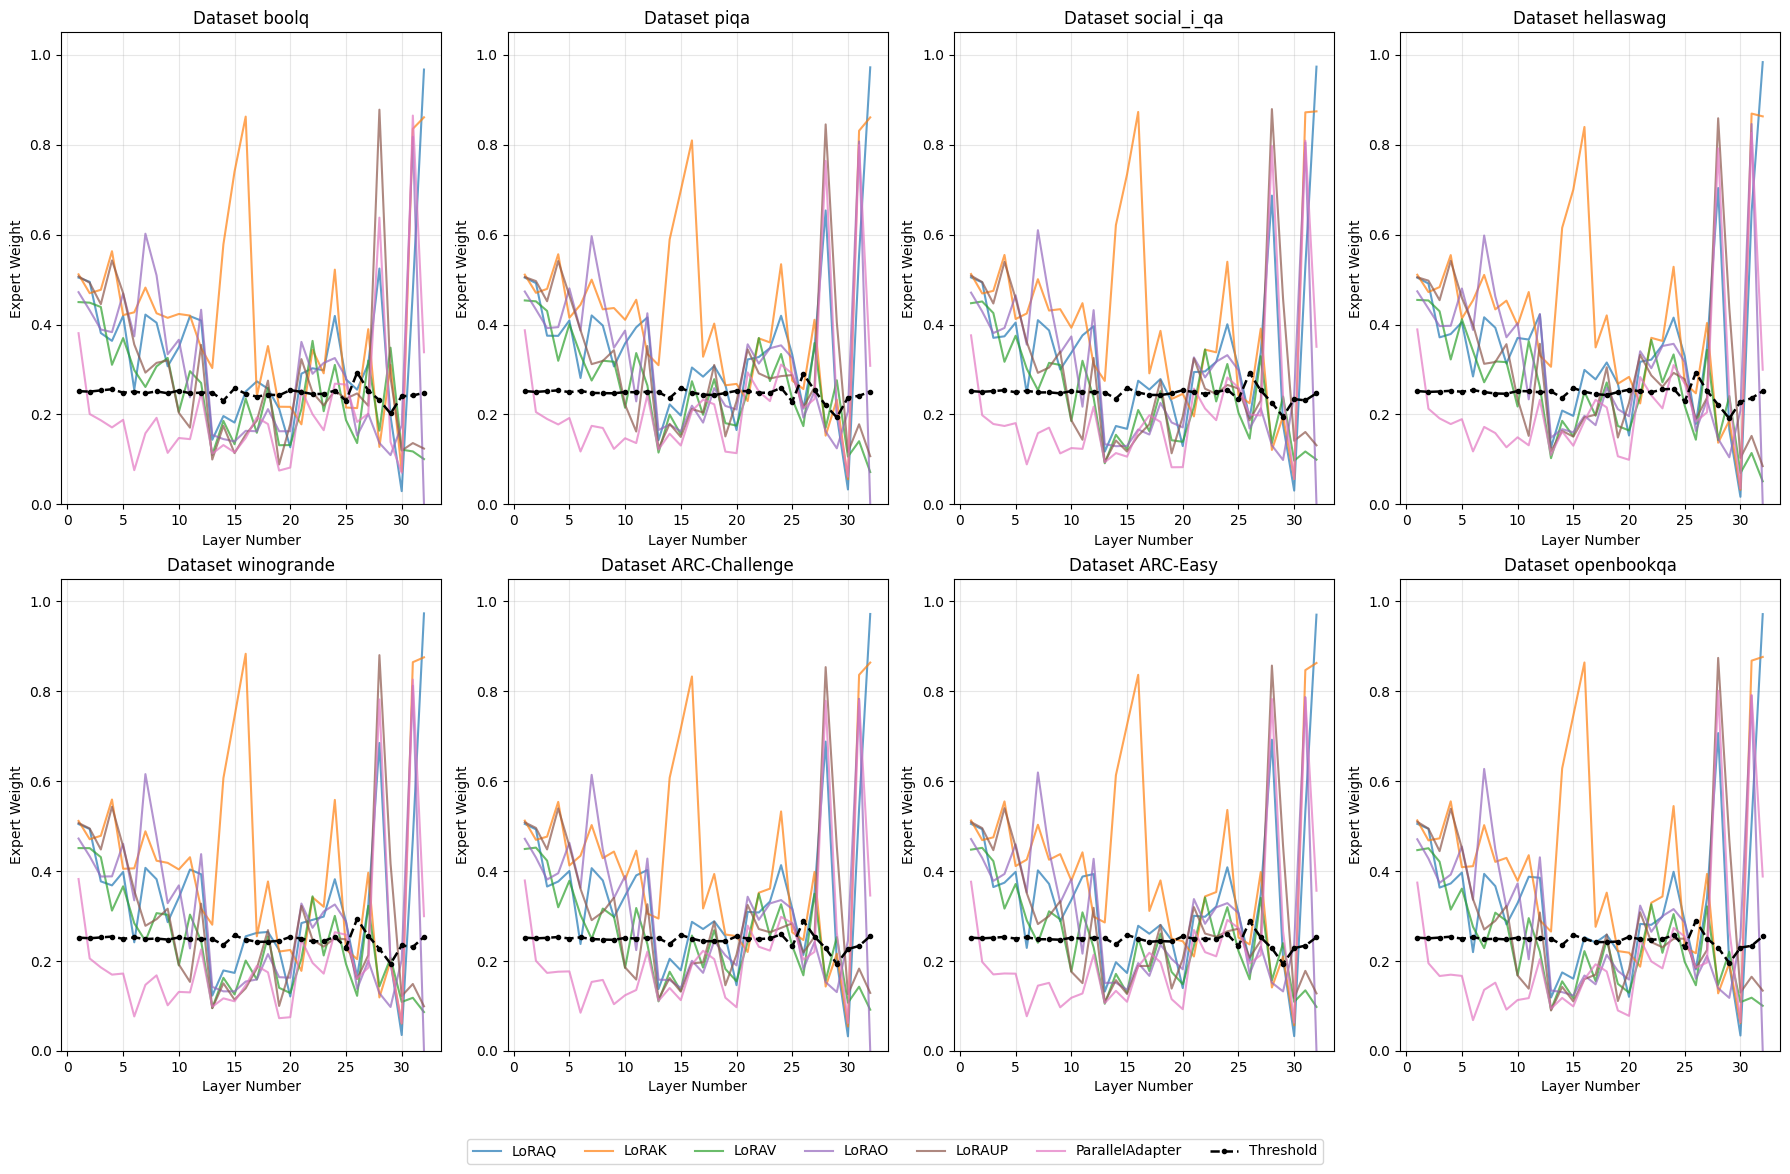

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 模拟数据设置
datasets_name = datasets_name.split()
experts_name = sparse_moa_experts.split()

num_datasets = len(datasets_name)
num_layers = 32
num_experts = len(experts_name)

# 创建颜色映射
colors = plt.cm.tab10.colors[:num_experts+1] # keep same with soft moa
colors = list(colors)
colors.pop(3)
# 创建画布和子图
fig, axs = plt.subplots(2, int(num_datasets/2), figsize=(18, 12))
axs = axs.flatten()

# 绘制每个数据集
for idx, (ax, data) in enumerate(zip(axs, datasets)):
    # 绘制专家权重曲线
    for expert in range(num_experts):
        ax.plot(range(1, num_layers+1), 
                data['weights'][:, expert],
                color=colors[expert],
                linewidth=1.5,
                alpha=0.7,
                label=f'{experts_name[expert]}' if idx == 0 else "")
    
    # 绘制动态阈值线
    ax.plot(range(1, num_layers+1), 
           data['thresholds'],
           color='black',
           linestyle='--',
           linewidth=1.8,
           marker='o',
           markersize=3,
           label='Threshold' if idx == 0 else "")
    
    # 设置图表属性
    ax.set_title(f'Dataset {datasets_name[idx]}', fontsize=12)
    ax.set_xlabel('Layer Number', fontsize=10)
    ax.set_ylabel('Expert Weight', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1.05)  # 适当扩大y轴范围

# 添加公共图例
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, 
           loc='lower center', 
           ncol=8,
           fontsize=10,
           bbox_to_anchor=(0.5, 0.02))

# 调整布局
plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()

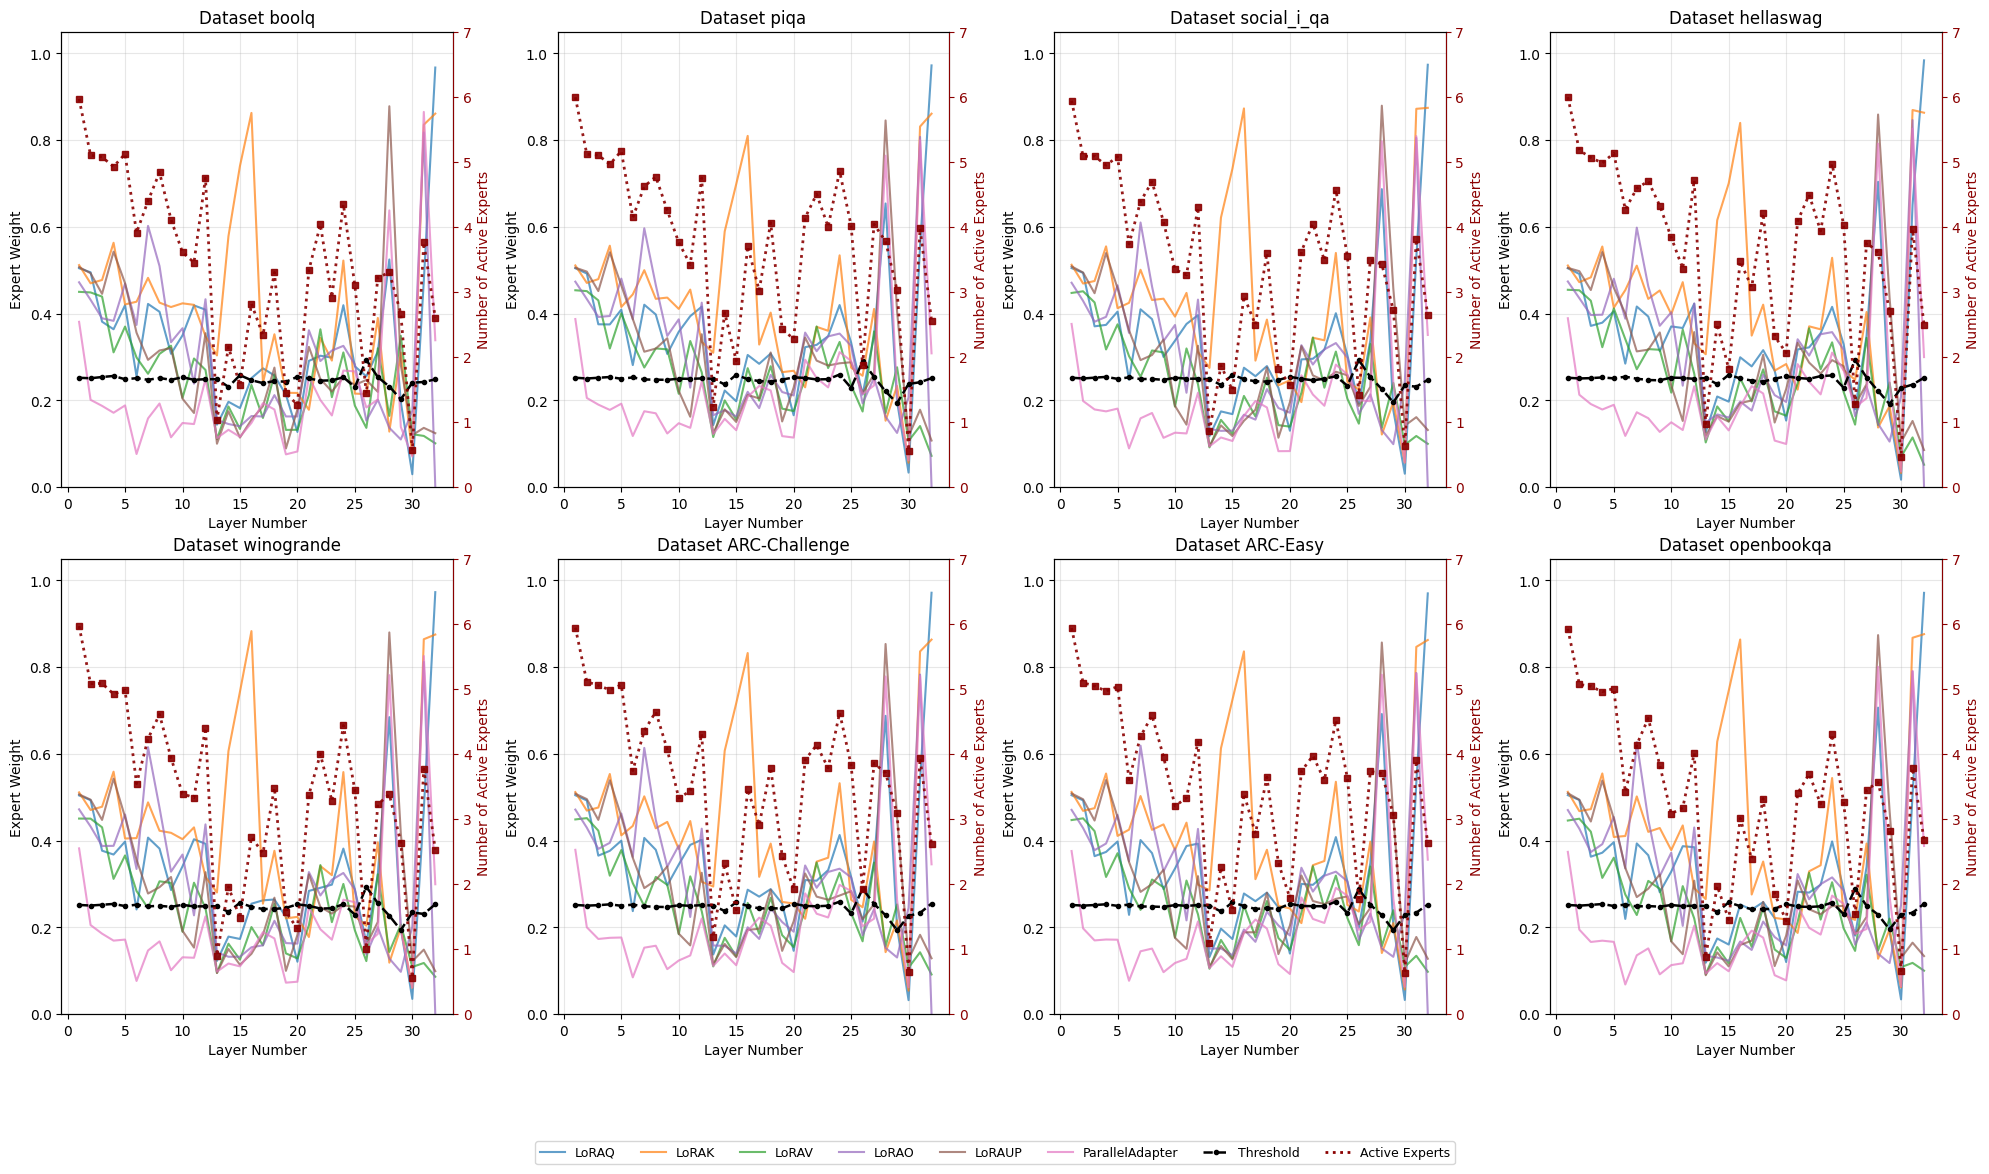

In [10]:
import matplotlib.pyplot as plt
import numpy as np


# 创建画布和子图（带双y轴）
fig, axs = plt.subplots(2, int(num_datasets/2), figsize=(20, 12))
axs = axs.flatten()

# 绘制每个数据集
for idx, (ax, data) in enumerate(zip(axs, datasets)):
    # 创建双y轴
    ax2 = ax.twinx()
    
    # ===== 左侧y轴：专家权重 =====
    for expert in range(num_experts):
        ax.plot(range(1, num_layers+1), 
                data['weights'][:, expert],
                color=colors[expert],
                linewidth=1.5,
                alpha=0.7,
                linestyle='-',
                label=f'{experts_name[expert]}' if idx == 0 else "")
    
    # 绘制动态阈值线（左侧轴）
    ax.plot(range(1, num_layers+1), 
           data['thresholds'],
           color='black',
           linestyle='--',
           linewidth=1.8,
           marker='o',
           markersize=3,
           label='Threshold' if idx == 0 else "")

    # ===== 右侧y轴：专家数量 =====
    ax2.plot(range(1, num_layers+1), 
            data['experts'],
            color='darkred',
            linewidth=2,
            linestyle=':',
            marker='s',
            markersize=4,
            alpha=0.9,
            label='Active Experts' if idx == 0 else "")

    # ===== 图表样式设置 =====
    # 左侧轴设置
    ax.set_title(f'Dataset {datasets_name[idx]}', fontsize=12)
    ax.set_xlabel('Layer Number', fontsize=10)
    ax.set_ylabel('Expert Weight', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1.05)
    
    # 右侧轴设置
    ax2.set_ylabel('Number of Active Experts', fontsize=10)
    ax2.set_ylim(0, num_experts+1)  # 专家数量范围
    ax2.yaxis.label.set_color('darkred')
    ax2.tick_params(axis='y', colors='darkred')
    ax2.spines['right'].set_color('darkred')

# ===== 统一图例处理 =====
# 获取所有句柄和标签
handles_l, labels_l = axs[0].get_legend_handles_labels()
handles_r = [plt.Line2D([0], [0], color='darkred', linestyle=':', linewidth=2)] 
labels_r = ['Active Experts']

# 合并图例
fig.legend(handles_l + handles_r, 
          labels_l + labels_r,
          loc='lower center',
          ncol=num_experts+2,  # 专家数量+阈值+激活专家
          fontsize=9,
          bbox_to_anchor=(0.5, 0.02))

# 调整布局
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # 增大底部空间
plt.show()

In [11]:
colors

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)]

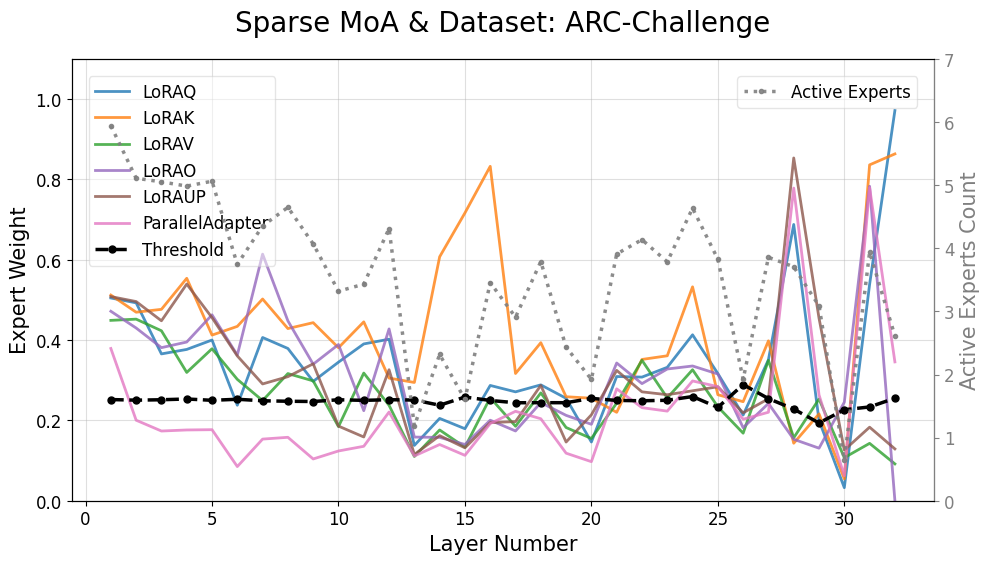

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 只取一个数据集
data = datasets[5]
dataset_name = datasets_name[5]

# 创建带双y轴的单个画布
fig, ax = plt.subplots(figsize=(10, 6))
ax2 = ax.twinx()

# ===== 左侧y轴：专家权重 =====
for expert in range(num_experts):
    ax.plot(range(1, num_layers+1), 
            data['weights'][:, expert],
            color=colors[expert],
            linewidth=2,  # 加粗线宽
            alpha=0.8,
            linestyle='-',
            label=f'{experts_name[expert]}')

# 绘制动态阈值线（左侧轴）
ax.plot(range(1, num_layers+1), 
       data['thresholds'],
       color='black',
       linestyle='--',
       linewidth=2.5,  # 更醒目的阈值线
       marker='o',
       markersize=5,
       label='Threshold')

# ===== 右侧y轴：专家数量 =====
ax2.plot(range(1, num_layers+1), 
        data['experts'],
        color='gray',
        linewidth=2.5,  # 加粗专家数量线
        linestyle=':',
        marker='.',
        markersize=6,
        alpha=0.9,
        label='Active Experts')

# ===== 图表样式优化 =====
# 左侧轴设置
ax.set_title(f'Sparse MoA & Dataset: {dataset_name}', fontsize=20, pad=20)
ax.set_xlabel('Layer Number', fontsize=15)
ax.set_ylabel('Expert Weight', fontsize=15)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, alpha=0.4)
ax.set_ylim(0, 1.1)  # 扩展顶部空间

# 右侧轴设置
ax2.set_ylabel('Active Experts Count', fontsize=15, color='gray')
ax2.set_ylim(0, num_experts+1)
ax2.tick_params(axis='y', colors='gray', labelsize=12)
ax2.spines['right'].set_color('gray')

# ===== 智能图例布局 =====
# 合并两个轴的句柄和标签
handles_l, labels_l = ax.get_legend_handles_labels()
handles_r, labels_r = ax2.get_legend_handles_labels()

# 创建分类图例
legend1 = ax.legend(handles_l, labels_l, 
                   loc='upper left', 
                   bbox_to_anchor=(0.01, 0.98),
                   framealpha=0.5, fontsize=12)

legend2 = ax.legend(handles_r, labels_r, 
                   loc='upper right',
                   bbox_to_anchor=(0.99, 0.98),
                   framealpha=0.5, fontsize=12)

# 手动添加第二个图例
ax.add_artist(legend1)

# 调整边距
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # 为标题留出空间
plt.savefig(f'sparsemoa_routerstats_{dataset_name}.pdf', bbox_inches='tight', dpi=350)
plt.show()

In [12]:
# 对每个数据集求32层均值，
import matplotlib.pyplot as plt
import numpy as np

# 生成带动态阈值的模拟数据
np.random.seed(42)
dataset_stats = []
for ds in datasets:
    
    # 计算各专家的层平均权重
    expert_means = np.mean(ds['weights'], axis=0)
    
    # 计算阈值平均值
    threshold_mean = np.mean(ds['thresholds'])

    # 计算专家激活数量均值
    experts = np.mean(ds['experts'])
    
    dataset_stats.append({
        'expert_means': expert_means,
        'threshold_mean': threshold_mean,
        'experts':experts
    })


In [11]:
dataset_stats

[{'expert_means': array([0.33508688, 0.4143196 , 0.24756499, 0.2960834 , 0.28221673,
         0.21377976], dtype=float32),
  'threshold_mean': np.float32(0.24712998),
  'experts': np.float32(3.325943)},
 {'expert_means': array([0.35453013, 0.42775968, 0.26432204, 0.3140762 , 0.30431816,
         0.23557974], dtype=float32),
  'threshold_mean': np.float32(0.2471588),
  'experts': np.float32(3.7095108)},
 {'expert_means': array([0.33648685, 0.41950092, 0.24032845, 0.29500505, 0.2879002 ,
         0.21824293], dtype=float32),
  'threshold_mean': np.float32(0.24693957),
  'experts': np.float32(3.3736389)},
 {'expert_means': array([0.35476744, 0.4301932 , 0.2561658 , 0.31099355, 0.30029   ,
         0.23108017], dtype=float32),
  'threshold_mean': np.float32(0.24740046),
  'experts': np.float32(3.6349466)},
 {'expert_means': array([0.3310521 , 0.41400477, 0.23497593, 0.2905929 , 0.2793806 ,
         0.21024062], dtype=float32),
  'threshold_mean': np.float32(0.24663967),
  'experts': np.flo

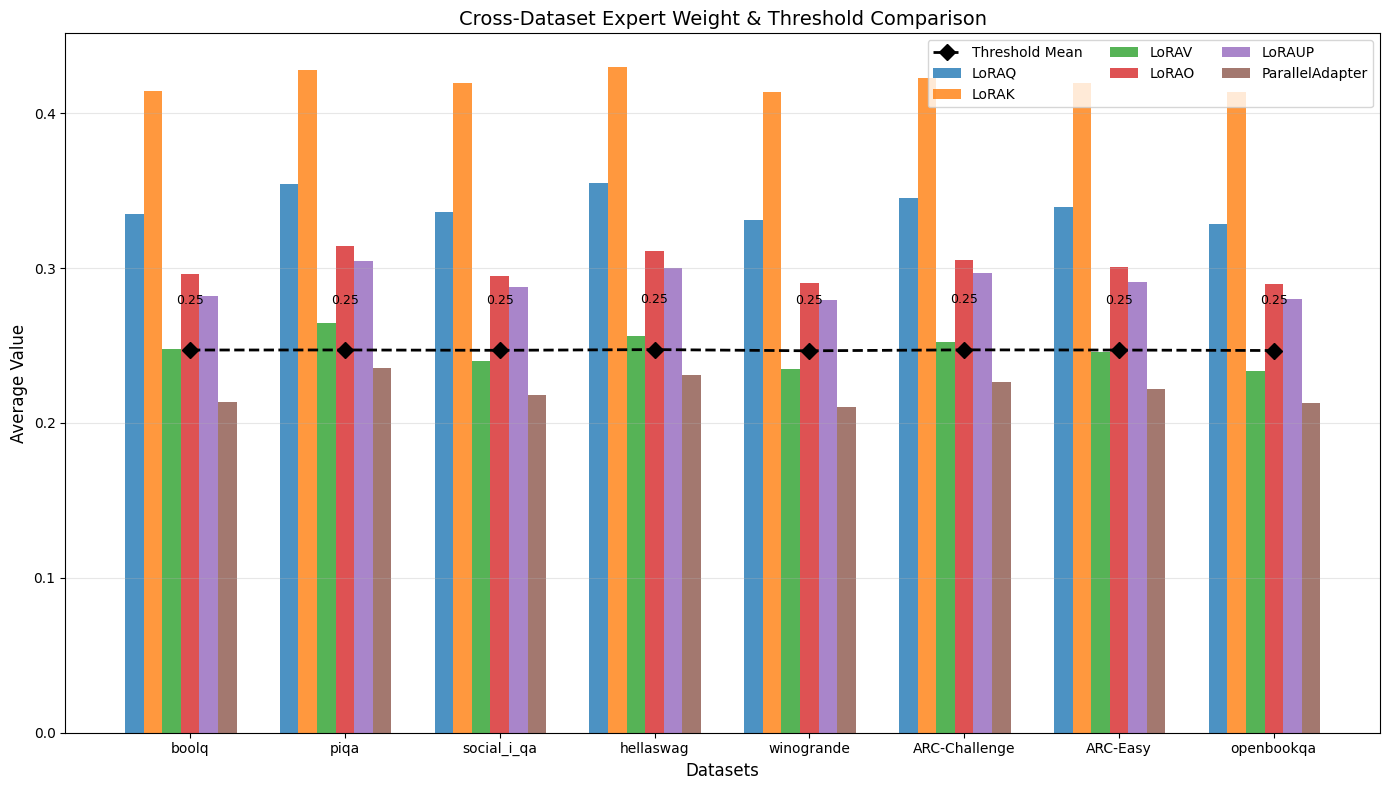

In [13]:

# 可视化设置
colors = plt.cm.tab10.colors[:num_experts]
dataset_labels = datasets_name
x = np.arange(num_datasets)  # 数据集位置
width = 0.12  # 柱状图宽度

# 创建画布
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制每个专家的柱状图
for expert_idx in range(num_experts):
    # 获取所有数据集当前专家的均值
    expert_values = [ds['expert_means'][expert_idx] for ds in dataset_stats]
    
    # 计算柱状图位置偏移
    offset = width * (expert_idx - num_experts//2)
    
    ax.bar(x + offset, 
           expert_values, 
           width=width,
           color=colors[expert_idx],
           alpha=0.8,
           label=f'{experts_name[expert_idx]}')

# 绘制阈值均值折线
threshold_values = [ds['threshold_mean'] for ds in dataset_stats]
ax.plot(x, threshold_values,
        color='black', 
        marker='D',
        linestyle='--',
        linewidth=2,
        markersize=8,
        label='Threshold Mean')

# 图表装饰
ax.set_title('Cross-Dataset Expert Weight & Threshold Comparison', fontsize=14)
ax.set_xlabel('Datasets', fontsize=12)
ax.set_ylabel('Average Value', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(dataset_labels)
ax.grid(True, axis='y', alpha=0.3)
ax.legend(loc='upper right', ncol=3)

# 添加数值标签
for i, thresh in enumerate(threshold_values):
    ax.text(i, thresh+0.03, f'{thresh:.2f}',
            ha='center', 
            color='black',
            fontsize=9)

plt.tight_layout()
plt.show()

# soft MOA  router stats

In [14]:
# math
datasets_name = math_datasets
path = '/home2/caojie/outputs/LLaMA3-1_lora_moe_structure/math_14k/b32_epoch2_warme1_loralayers0-32_lorar8_loraQ,K,V,O,FFN_DOWN_alpha8_expertnum1_hydraTrue_padapter_layers0-32_padaptersize16_padapterhydraTrue_prompt_layers0-32_prompt_len10_swi_x4_blr6e-3_maxseq300_flashatt2False_bf16True_sigmoid1Gpu/AddSub_mingen120_router_statsroute_stats.pth'
path = '/home2/caojie/outputs/LLaMA3-1_lora_moe_structure/math_14k/b32_epoch2_warme1_loralayers0-32_lorar8_loraQ,K,V,O,FFN_DOWN_alpha8_expertnum1_hydraTrue_padapter_layers0-32_padaptersize16_padapterhydraTrue_prompt_layers0-32_prompt_len10_swi_x4_blr6e-3_maxseq300_flashatt2False_bf16True_seed12251G1/AddSub_mingen120_routerStatsroute_stats.pth'

# commonsense
datasets_name = commonsense_datasets
path = '/home2/caojie/outputs/LLaMA3-1_lora_moe_structure/commonsense_15k/b32_epoch2_warme1_loralayers0-32_lorar8_loraQ,K,V,O,FFN_DOWN_alpha8_expertnum1_hydraTrue_padapter_layers0-32_padaptersize16_padapterhydraTrue_prompt_layers0-32_prompt_len10_blr6e-3_maxseq200_flashatt2False_bf16True_sigmoid/boolq_mingen10_routerStatsroute_stats.pth'
path = '/home2/caojie/outputs/LLaMA3-1_lora_moe_structure/commonsense_15k/b32_epoch2_warme1_loralayers0-32_lorar8_loraQ,K,V,O,FFN_DOWN_alpha8_expertnum1_hydraTrue_padapter_layers0-32_padaptersize16_padapterhydraTrue_prompt_layers0-32_prompt_len10_swi_x0_blr6e-3_maxseq200_flashatt2False_bf16True_seed0_/boolq_mingen10_routerStatsroute_stats.pth'

In [15]:
soft_moa_experts = 'LoRAQ LoRAK LoRAV Prompt LoRAO LoRAUP ParallelAdapter'

In [16]:
data = torch.load(path.replace('AddSub', 'MultiArith'))

/tmp/ipykernel_1655513/3582213934.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(path.replace('AddSub', 'MultiArith'))


In [17]:
data

{0: {'sum_weights': tensor([1522.6797, 1522.9277, 1400.8555, 1409.3496, 1395.3906, 1481.4824,
          1112.4902], device='cuda:0')},
 1: {'sum_weights': tensor([1344.7676, 1345.0488, 1046.1973, 1209.3496, 1238.3086, 1316.1992,
           578.6067], device='cuda:0')},
 2: {'sum_weights': tensor([1086.1797,  938.6143, 1088.7227, 1137.0391, 1128.6426, 1250.9375,
           405.6648], device='cuda:0')},
 3: {'sum_weights': tensor([1017.1924, 1230.0879,  876.4727, 1265.4513, 1081.5508, 1052.4629,
           538.4073], device='cuda:0')},
 4: {'sum_weights': tensor([1026.9062, 1087.0830,  818.6245, 1055.5586, 1060.0254,  913.4570,
           449.2944], device='cuda:0')},
 5: {'sum_weights': tensor([ 810.6260, 1129.6857,  586.3755, 1618.7227,  739.5410, 1055.0088,
           502.8015], device='cuda:0')},
 6: {'sum_weights': tensor([ 833.9468, 1348.2899,  831.8223, 1570.9121, 1261.0156,  776.0645,
           340.0503], device='cuda:0')},
 7: {'sum_weights': tensor([ 959.6182, 1227.2074,  729.

In [18]:
datasets = []
for ds in datasets_name.split():
    if 'boolq' in datasets_name:
        data = torch.load(path.replace('boolq', ds))
    else:
        data = torch.load(path.replace('AddSub', ds))
    layer_weights = []
    for i in range(32):
        layer = data[i]
        layer_weights.append(layer['sum_weights'])
    weights = torch.stack(layer_weights) / data['token_num']
    print(weights.shape)
    datasets.append({
        'weights': weights.cpu().numpy(),
    }) 

torch.Size([32, 7])
torch.Size([32, 7])
torch.Size([32, 7])
torch.Size([32, 7])
torch.Size([32, 7])
torch.Size([32, 7])
torch.Size([32, 7])
torch.Size([32, 7])


/tmp/ipykernel_1655513/3726072746.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(path.replace('boolq', ds))


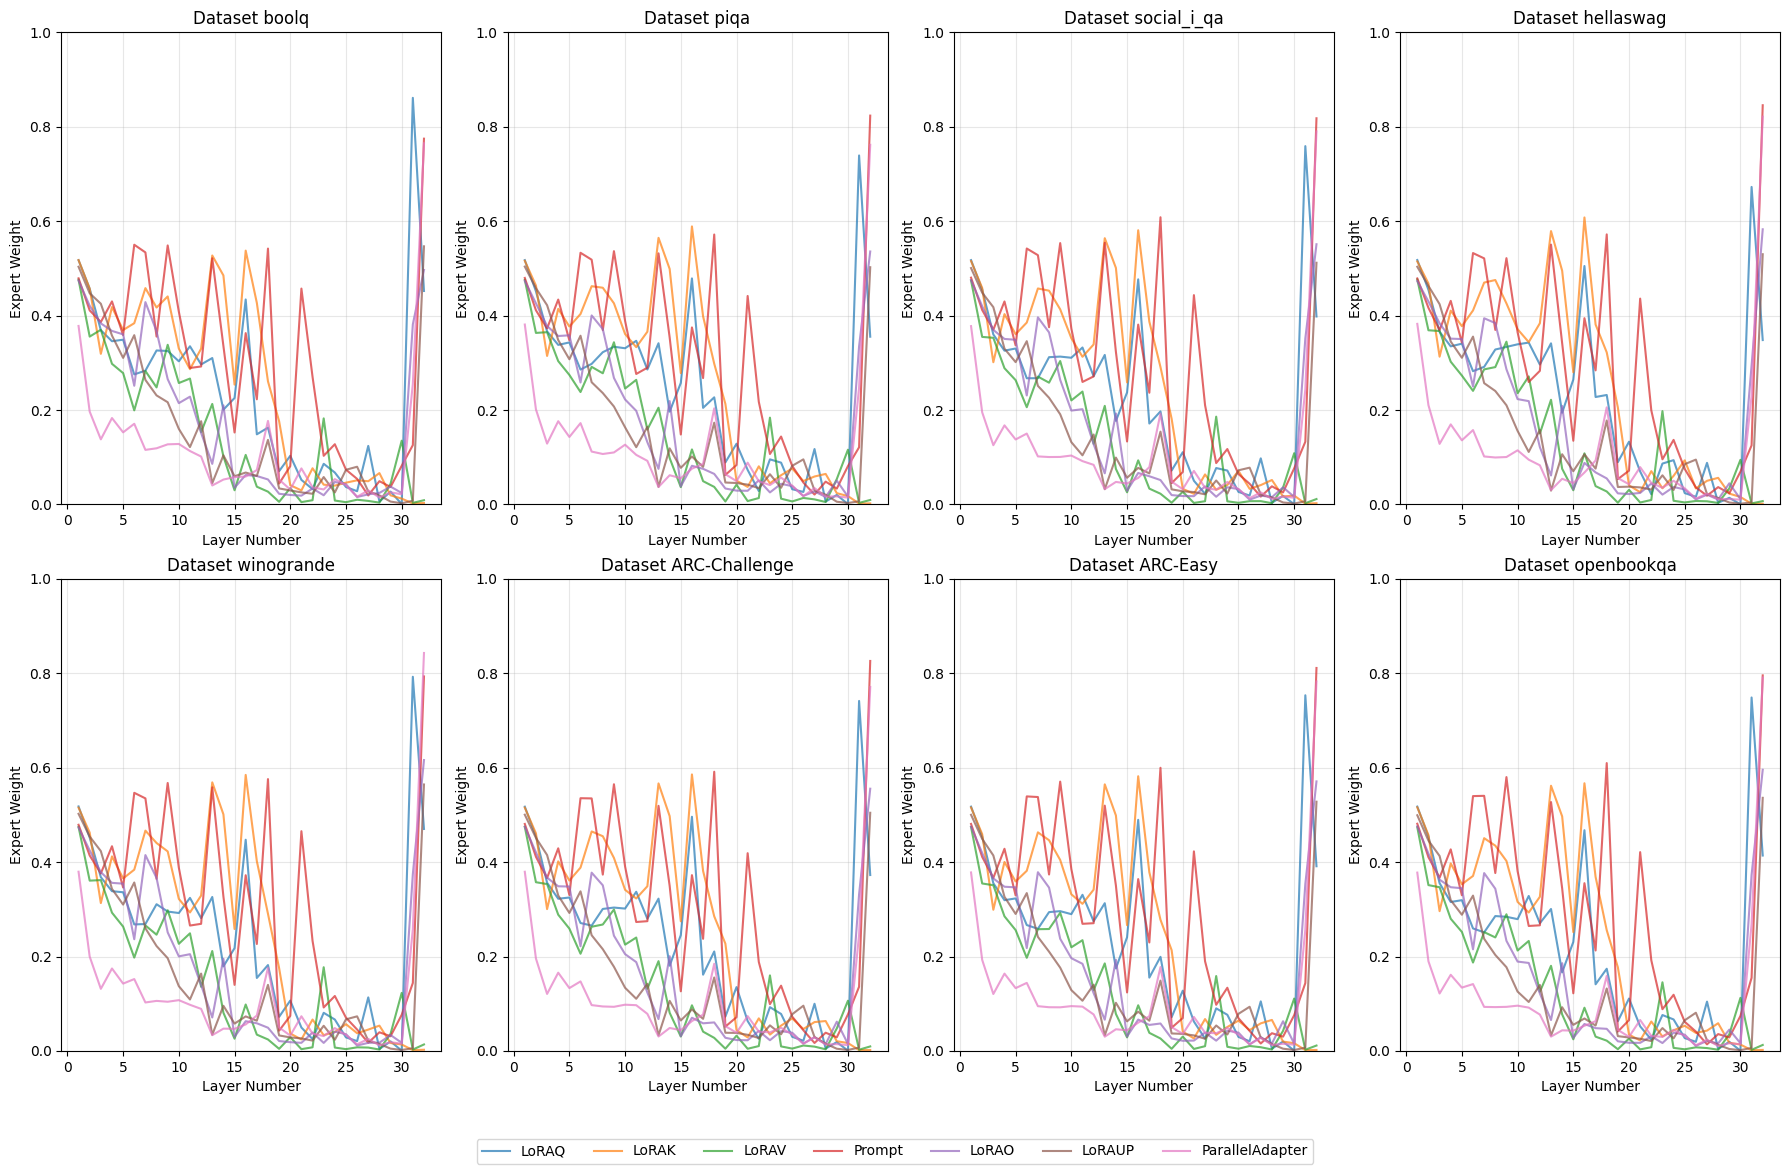

In [19]:
import matplotlib.pyplot as plt
import numpy as np

datasets_name = datasets_name.split()
experts_name = soft_moa_experts.split()

num_datasets = len(datasets_name)
num_layers = 32
num_experts = len(experts_name)

# 创建颜色映射
colors = plt.cm.tab10.colors[:num_experts]

# 创建画布和子图
fig, axs = plt.subplots(2, int(num_datasets/2), figsize=(18, 12))
axs = axs.flatten()

# 绘制每个数据集
for idx, (ax, data) in enumerate(zip(axs, datasets)):
    # 绘制专家权重曲线
    for expert_idx in range(num_experts):
        ax.plot(range(1, num_layers+1), 
                data['weights'][:, expert_idx],
                color=colors[expert_idx],
                linewidth=1.5,
                alpha=0.7,
                label=f'{experts_name[expert_idx]}' if idx == 0 else "")
    
    # 设置图表属性
    ax.set_title(f'Dataset {datasets_name[idx]}', fontsize=12)
    ax.set_xlabel('Layer Number', fontsize=10)
    ax.set_ylabel('Expert Weight', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1)  # 适当扩大y轴范围

# 添加公共图例
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, 
           loc='lower center', 
           ncol=8,
           fontsize=10,
           bbox_to_anchor=(0.5, 0.02))

# 调整布局
plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()

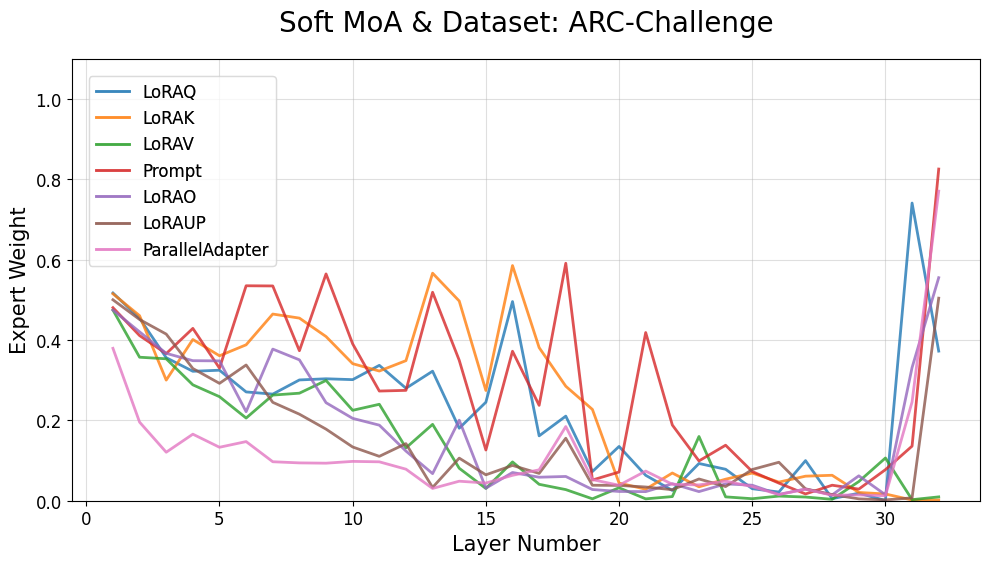

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# 只取第一个数据集
data = datasets[5]
dataset_name = datasets_name[5]

# 创建带双y轴的单个画布
fig, ax = plt.subplots(figsize=(10, 6))

# ===== 左侧y轴：专家权重 =====
for expert in range(num_experts):
    ax.plot(range(1, num_layers+1), 
            data['weights'][:, expert],
            color=colors[expert],
            linewidth=2,  # 加粗线宽
            alpha=0.8,
            linestyle='-',
            label=f'{experts_name[expert]}')

# ===== 图表样式优化 =====
# 左侧轴设置
ax.set_title(f'Soft MoA & Dataset: {dataset_name}', fontsize=20, pad=20)
ax.set_xlabel('Layer Number', fontsize=15)
ax.set_ylabel('Expert Weight', fontsize=15)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, alpha=0.4)
ax.set_ylim(0, 1.1)  # 扩展顶部空间

# ===== 智能图例布局 =====
# 合并两个轴的句柄和标签
handles_l, labels_l = ax.get_legend_handles_labels()

# 创建分类图例
legend1 = ax.legend(handles_l, labels_l, 
                   loc='upper left', 
                   bbox_to_anchor=(0.01, 0.98),
                   framealpha=0.5, fontsize=12)

# 手动添加第二个图例
ax.add_artist(legend1)

# 调整边距
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # 为标题留出空间
plt.savefig(f'softmoa_routerstats_{dataset_name}.pdf', bbox_inches='tight', dpi=350)
plt.show()

In [21]:
# 对每个数据集求32层均值，
import matplotlib.pyplot as plt
import numpy as np

dataset_stats = []
for ds in datasets:
    
    # 计算各专家的层平均权重
    expert_means = np.mean(ds['weights'], axis=0)
    
    dataset_stats.append({
        'expert_means': expert_means,
    })

In [44]:
dataset_stats

[{'expert_means': array([0.4805971 , 0.5742227 , 0.37796238, 0.4007616 , 0.53150797,
         0.37962177, 0.07354035], dtype=float32)},
 {'expert_means': array([0.47666696, 0.56772673, 0.393852  , 0.40767157, 0.5269735 ,
         0.39097503, 0.09107019], dtype=float32)},
 {'expert_means': array([0.47369626, 0.57457703, 0.37324703, 0.40125   , 0.52544665,
         0.3733989 , 0.07093701], dtype=float32)},
 {'expert_means': array([0.4791042 , 0.576375  , 0.36794528, 0.39692584, 0.5308496 ,
         0.3733843 , 0.06625208], dtype=float32)},
 {'expert_means': array([0.4783985 , 0.57462865, 0.3769401 , 0.39931223, 0.5321555 ,
         0.37837923, 0.07277557], dtype=float32)},
 {'expert_means': array([0.47701323, 0.5738809 , 0.37517276, 0.39989278, 0.5310743 ,
         0.3752514 , 0.06977194], dtype=float32)}]

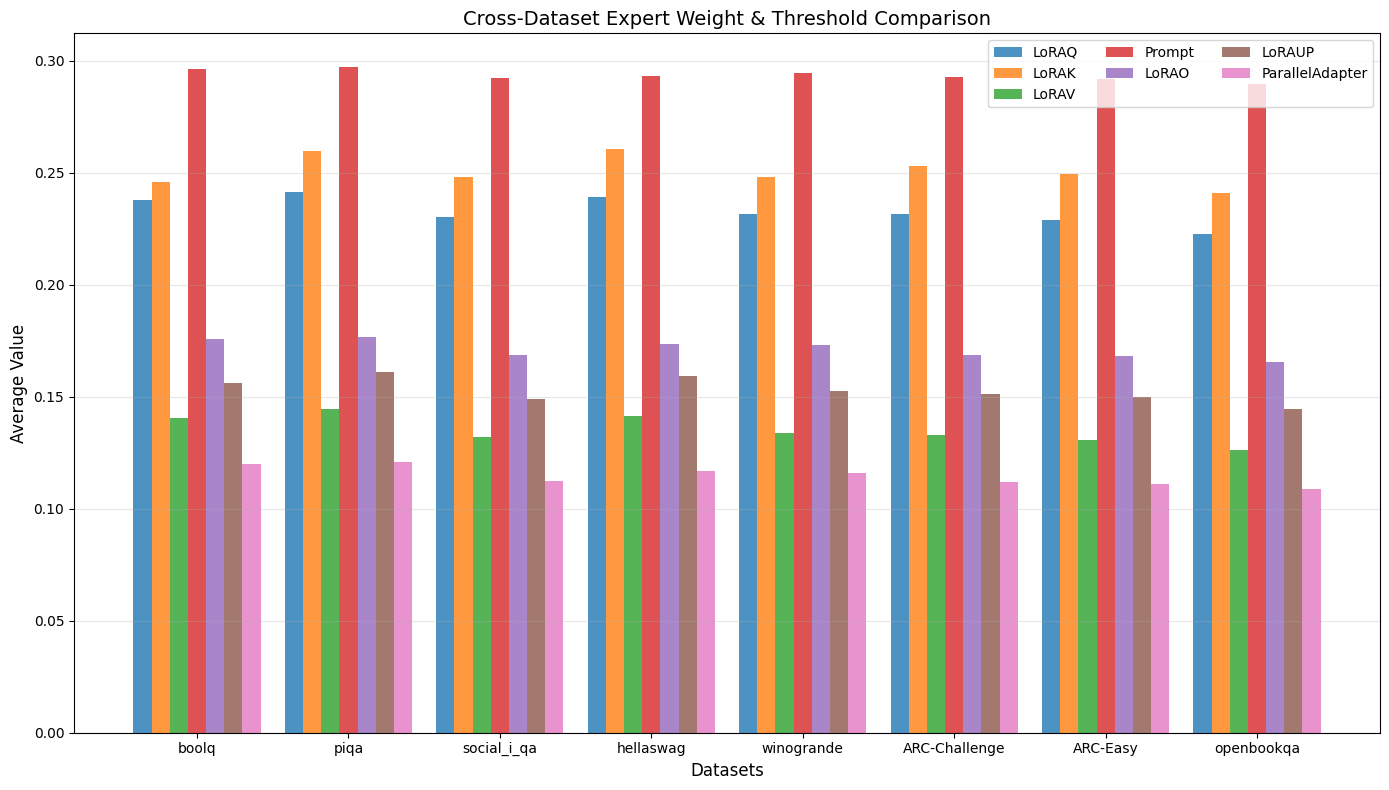

In [22]:

# 可视化设置
colors = plt.cm.tab10.colors[:num_experts]
dataset_labels = datasets_name
x = np.arange(num_datasets)  # 数据集位置
width = 0.12  # 柱状图宽度

# 创建画布
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制每个专家的柱状图
for expert_idx in range(num_experts):
    # 获取所有数据集当前专家的均值
    expert_values = [ds['expert_means'][expert_idx] for ds in dataset_stats]
    
    # 计算柱状图位置偏移
    offset = width * (expert_idx - num_experts//2)
    
    ax.bar(x + offset, 
           expert_values, 
           width=width,
           color=colors[expert_idx],
           alpha=0.8,
           label=f'{experts_name[expert_idx]}')

# 图表装饰
ax.set_title('Cross-Dataset Expert Weight & Threshold Comparison', fontsize=14)
ax.set_xlabel('Datasets', fontsize=12)
ax.set_ylabel('Average Value', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(dataset_labels)
ax.grid(True, axis='y', alpha=0.3)
ax.legend(loc='upper right', ncol=3)


plt.tight_layout()
plt.show()

# 对比softmoa commonsense数据集下不同随机种子下训练的的 router分布

In [23]:
boolq_seed_path = '/home2/caojie/outputs/LLaMA3-1_lora_moe_structure/commonsense_15k/b32_epoch2_warme1_loralayers0-32_lorar8_loraQ,K,V,O,FFN_DOWN_alpha8_expertnum1_hydraTrue_padapter_layers0-32_padaptersize16_padapterhydraTrue_prompt_layers0-32_prompt_len10_swi_x0_blr6e-3_maxseq200_flashatt2False_bf16True_seed0_/boolq_mingen10_routerStatsroute_stats.pth'
boolq_seed_path1= boolq_seed_path.replace('seed0','seed0125')
boolq_seed_path2= boolq_seed_path.replace('seed0','seed1225')
seed_paths = [boolq_seed_path, boolq_seed_path1, boolq_seed_path2]

In [24]:
seed_data_l = []
for seed_path in seed_paths:
    data = torch.load(seed_path)
    layer_weights = []
    layer_threshold = []
    for i in range(32):
        layer = data[i]
        layer_weights.append(layer['sum_weights'])
    weights = torch.stack(layer_weights) / data['token_num']
    print(weights.shape)
    seed_data_l.append({
        'weights': weights.cpu().numpy() }) 

seed_data_MoA = seed_data_l

torch.Size([32, 7])
torch.Size([32, 7])
torch.Size([32, 7])


/tmp/ipykernel_1655513/3371522938.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(seed_path)


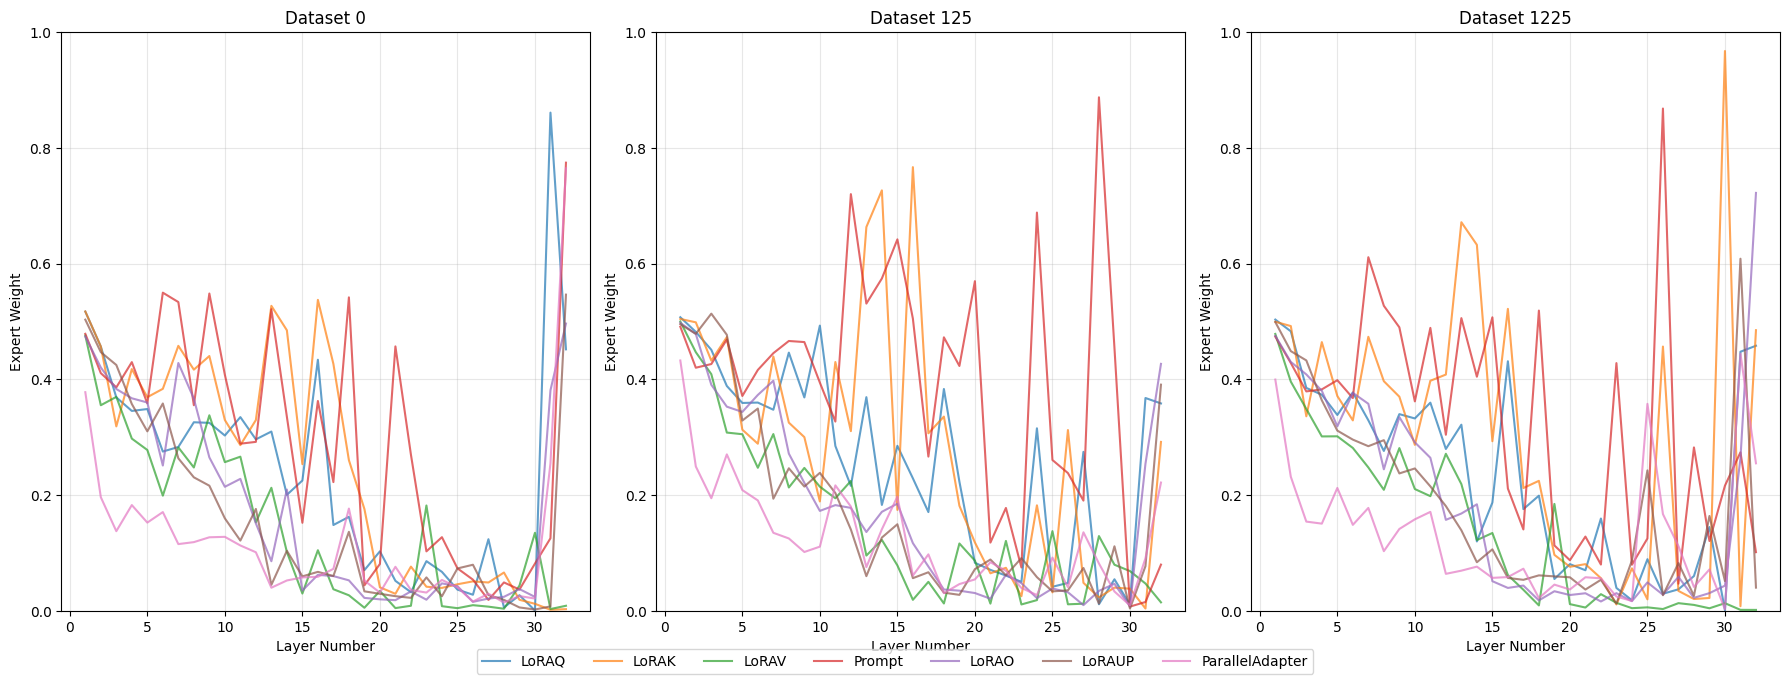

In [25]:
import matplotlib.pyplot as plt
import numpy as np

seeds = [0, 125,1225]
experts_name = soft_moa_experts.split()

num_seeds = len(seed_paths)
num_layers = 32
num_experts = len(experts_name)

# 创建颜色映射
colors = plt.cm.tab10.colors[:num_experts]

# 创建画布和子图
fig, axs = plt.subplots(1, num_seeds, figsize=(18, 7))
axs = axs.flatten()

# 绘制每个数据集
for idx, (ax, data) in enumerate(zip(axs, seed_data_l)):
    # 绘制专家权重曲线
    for expert_idx in range(num_experts):
        ax.plot(range(1, num_layers+1), 
                data['weights'][:, expert_idx],
                color=colors[expert_idx],
                linewidth=1.5,
                alpha=0.7,
                label=f'{experts_name[expert_idx]}' if idx == 0 else "")
    
    # 设置图表属性
    ax.set_title(f'Dataset {seeds[idx]}', fontsize=12)
    ax.set_xlabel('Layer Number', fontsize=10)
    ax.set_ylabel('Expert Weight', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1)  # 适当扩大y轴范围

# 添加公共图例
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, 
           loc='lower center', 
           ncol=8,
           fontsize=10,
           bbox_to_anchor=(0.5, 0.02))

# 调整布局
plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()

In [26]:
# 对每个数据集求32层均值，
import matplotlib.pyplot as plt
import numpy as np

seed_data_stats = []
for data in seed_data_l:
    
    # 计算各专家的层平均权重
    expert_means = np.mean(data['weights'], axis=0)
    
    seed_data_stats.append({
        'expert_means': expert_means,
    })

MoA_seed_data_stats = seed_data_stats

In [27]:
seed_data_stats

[{'expert_means': array([0.237858  , 0.24600485, 0.14056174, 0.2961559 , 0.17578183,
         0.15632448, 0.11978552], dtype=float32)},
 {'expert_means': array([0.25943625, 0.2787837 , 0.15209478, 0.39357188, 0.17682059,
         0.17235814, 0.12661052], dtype=float32)},
 {'expert_means': array([0.23468843, 0.30612308, 0.13807392, 0.32686016, 0.18510735,
         0.18335457, 0.1301336 ], dtype=float32)}]

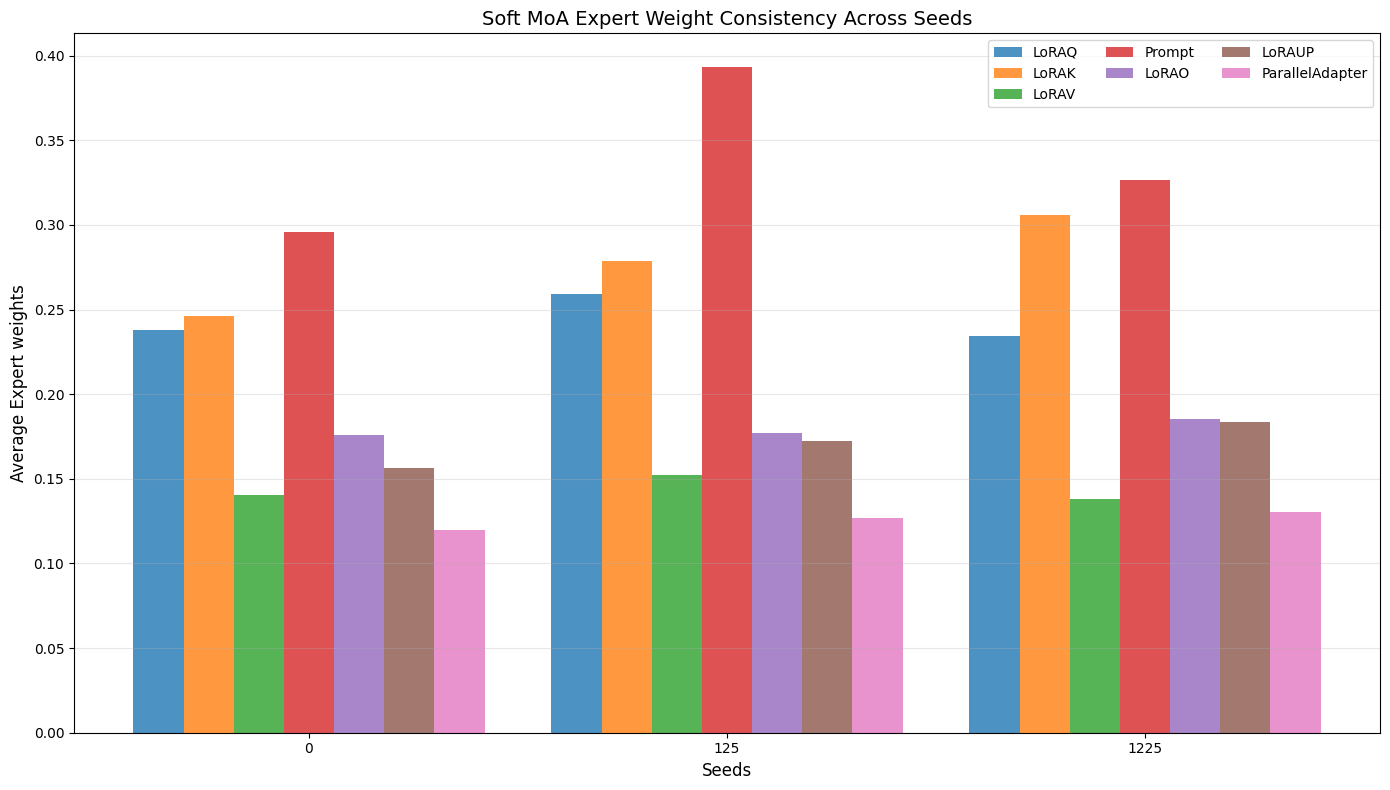

In [28]:
# 可视化设置
colors = plt.cm.tab10.colors[:num_experts]

x = np.arange(num_seeds)  # 数据集位置
width = 0.12  # 柱状图宽度

# 创建画布
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制每个专家的柱状图
for expert_idx in range(num_experts):
    # 获取所有数据集当前专家的均值
    expert_values = [ds['expert_means'][expert_idx] for ds in seed_data_stats]
    
    # 计算柱状图位置偏移
    offset = width * (expert_idx - num_experts//2)
    
    ax.bar(x + offset, 
           expert_values, 
           width=width,
           color=colors[expert_idx],
           alpha=0.8,
           label=f'{experts_name[expert_idx]}')

# 图表装饰
ax.set_title('Soft MoA Expert Weight Consistency Across Seeds', fontsize=14)
ax.set_xlabel('Seeds', fontsize=12)
ax.set_ylabel('Average Expert weights', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(seeds)
ax.grid(True, axis='y', alpha=0.3)
ax.legend(loc='upper right', ncol=3)


plt.tight_layout()
plt.show()

# Adamole 8 不同随机种子下专家（lora Up）的router权重分析

In [34]:
boolq_seed_path='/home2/caojie/outputs/LLaMA3-1_smoe/commonsense_15k/b4_gpu1_epoch2_warme1_loralayers0-32_lorar8_loraQ,K,V,O,FFN_DOWN_alpha8_expertnum8_noisy_routerFalse_adamoleTrue_lb_loss_coeff0_blr6e-3_maxseq200_flashatt2False_bf16True_seed0_/boolq_mingen10_routerstatsroute_stats.pth'
boolq_seed_path1= boolq_seed_path.replace('seed0','seed0125')
boolq_seed_path2= boolq_seed_path.replace('seed0','seed1225')
seed_paths = [boolq_seed_path,boolq_seed_path1,boolq_seed_path2]

In [35]:
seed_data_l = []
for seed_path in seed_paths:
    data = torch.load(seed_path)
    layer_weights = []
    layer_threshold = []
    for i in range(32):
        layer = data[i]
        layer_weights.append(layer['sum_weights'])
    weights = torch.stack(layer_weights) / data['token_num']
    print(weights.shape)
    seed_data_l.append({
        'weights': weights.cpu().numpy() }) 

seed_data_AdaMoLE = seed_data_l

torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([32, 8])


/tmp/ipykernel_1655513/318410176.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(seed_path)


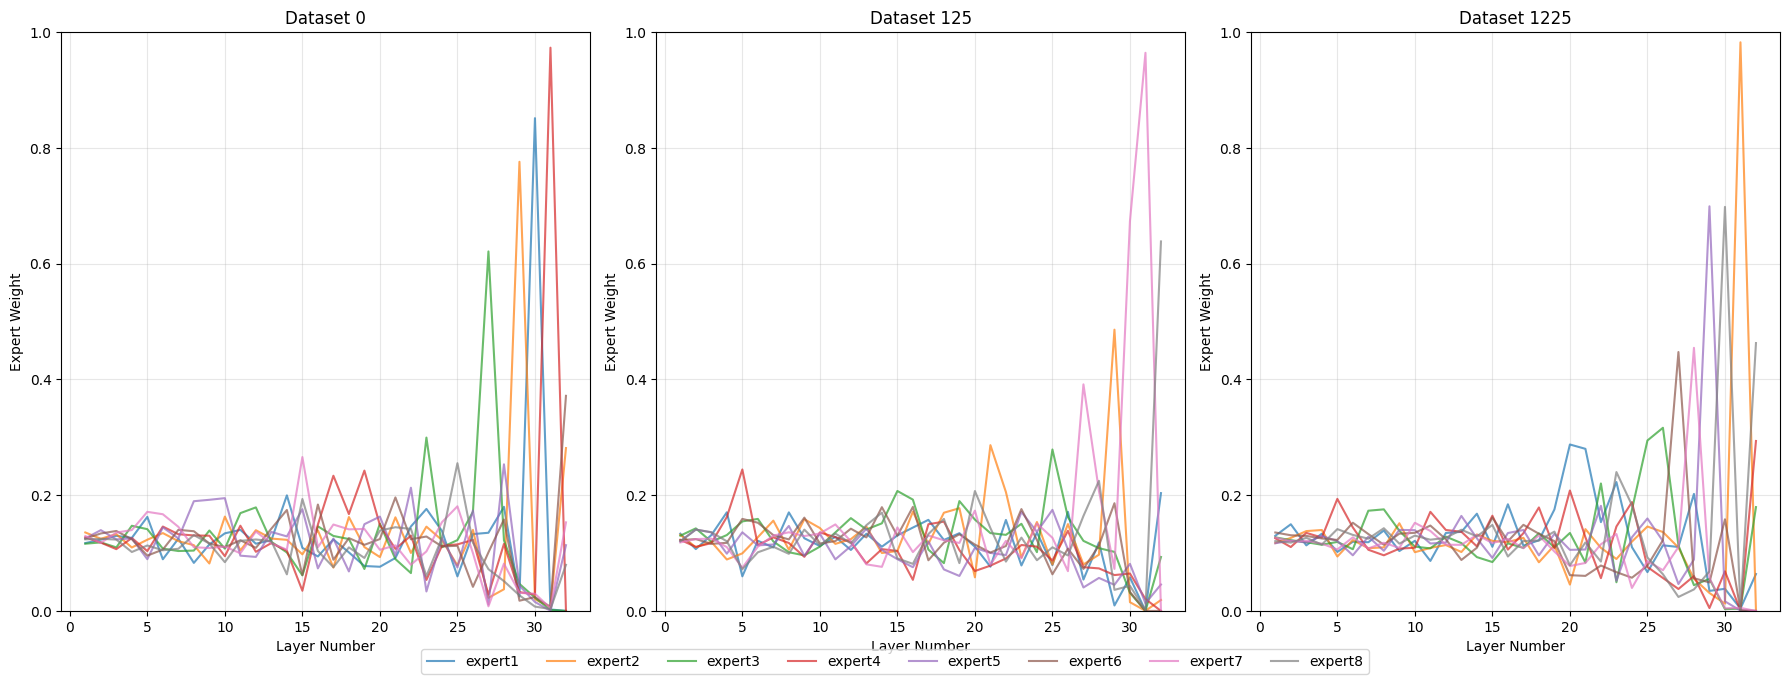

In [36]:
import matplotlib.pyplot as plt
import numpy as np

seeds = [0, 125,1225]
experts_name = [f'expert{i+1}'for i in range(seed_data_l[0]['weights'].shape[1])]

num_seeds = len(seed_paths)
num_layers = 32
num_experts = len(experts_name)

# 创建颜色映射
colors = plt.cm.tab10.colors[:num_experts]

# 创建画布和子图
fig, axs = plt.subplots(1, num_seeds, figsize=(18, 7))
axs = axs.flatten()

# 绘制每个数据集
for idx, (ax, data) in enumerate(zip(axs, seed_data_l)):
    # 绘制专家权重曲线
    for expert_idx in range(num_experts):
        ax.plot(range(1, num_layers+1), 
                data['weights'][:, expert_idx],
                color=colors[expert_idx],
                linewidth=1.5,
                alpha=0.7,
                label=f'{experts_name[expert_idx]}' if idx == 0 else "")
    
    # 设置图表属性
    ax.set_title(f'Dataset {seeds[idx]}', fontsize=12)
    ax.set_xlabel('Layer Number', fontsize=10)
    ax.set_ylabel('Expert Weight', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1)  # 适当扩大y轴范围

# 添加公共图例
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, 
           loc='lower center', 
           ncol=8,
           fontsize=10,
           bbox_to_anchor=(0.5, 0.02))

# 调整布局
plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()

In [37]:
# 对每个数据集求32层均值，
import matplotlib.pyplot as plt
import numpy as np

seed_data_stats = []
for data in seed_data_l:
    
    # 计算各专家的层平均权重
    expert_means = np.mean(data['weights'], axis=0)
    
    seed_data_stats.append({
        'expert_means': expert_means,
    })

AdaMolE_seed_data_stats = seed_data_stats

In [38]:
AdaMolE_seed_data_stats[0]['expert_means'].sum()

np.float32(1.000039)

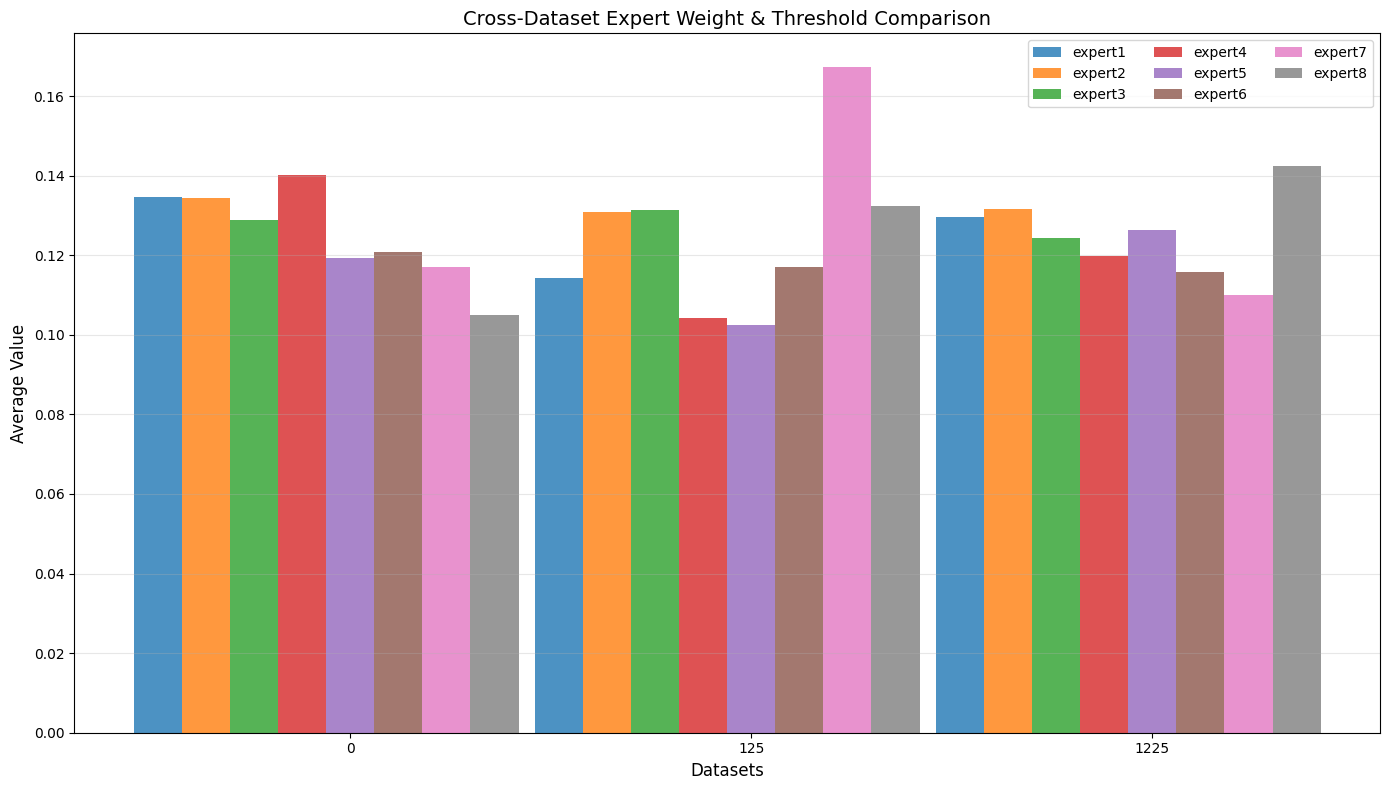

In [39]:
# 可视化设置
colors = plt.cm.tab10.colors[:num_experts]

x = np.arange(num_seeds)  # 数据集位置
width = 0.12  # 柱状图宽度

# 创建画布
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制每个专家的柱状图
for expert_idx in range(num_experts):
    # 获取所有数据集当前专家的均值
    expert_values = [ds['expert_means'][expert_idx] for ds in seed_data_stats]
    
    # 计算柱状图位置偏移
    offset = width * (expert_idx - num_experts//2)
    
    ax.bar(x + offset, 
           expert_values, 
           width=width,
           color=colors[expert_idx],
           alpha=0.8,
           label=f'{experts_name[expert_idx]}')

# 图表装饰
ax.set_title('Cross-Dataset Expert Weight & Threshold Comparison', fontsize=14)
ax.set_xlabel('Datasets', fontsize=12)
ax.set_ylabel('Average Value', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(seeds)
ax.grid(True, axis='y', alpha=0.3)
ax.legend(loc='upper right', ncol=3)


plt.tight_layout()
plt.show()

# MoLoRA 8  不同随机种子下不同专家的router

In [40]:
boolq_seed_path='/home2/caojie/outputs/LLaMA3-1_moe/commonsense_15k/b4_gpu1_epoch2_warme1_loralayers0-32_lorar8_loraQ,K,V,O,FFN_DOWN_alpha8_expertnum8_hydraFalse_blr6e-3_maxseq200_flashatt2False_bf16True_seed0_/boolq_mingen10_routerStatsroute_stats.pth'
boolq_seed_path1= boolq_seed_path.replace('seed0','seed0125')
boolq_seed_path2= boolq_seed_path.replace('seed0','seed1225')
seed_paths = [boolq_seed_path,boolq_seed_path1,boolq_seed_path2]

In [41]:
seed_data_l = []
for seed_path in seed_paths:
    data = torch.load(seed_path)
    layer_weights = []
    layer_threshold = []
    for i in range(32):
        layer = data[i]
        layer_weights.append(layer['sum_weights'])
    weights = torch.stack(layer_weights) / data['token_num']
    print(weights.shape)
    seed_data_l.append({
        'weights': weights.cpu().numpy() }) 

seed_data_MoE = seed_data_l

torch.Size([32, 8])
torch.Size([32, 8])
torch.Size([32, 8])


/tmp/ipykernel_1655513/3481045009.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(seed_path)


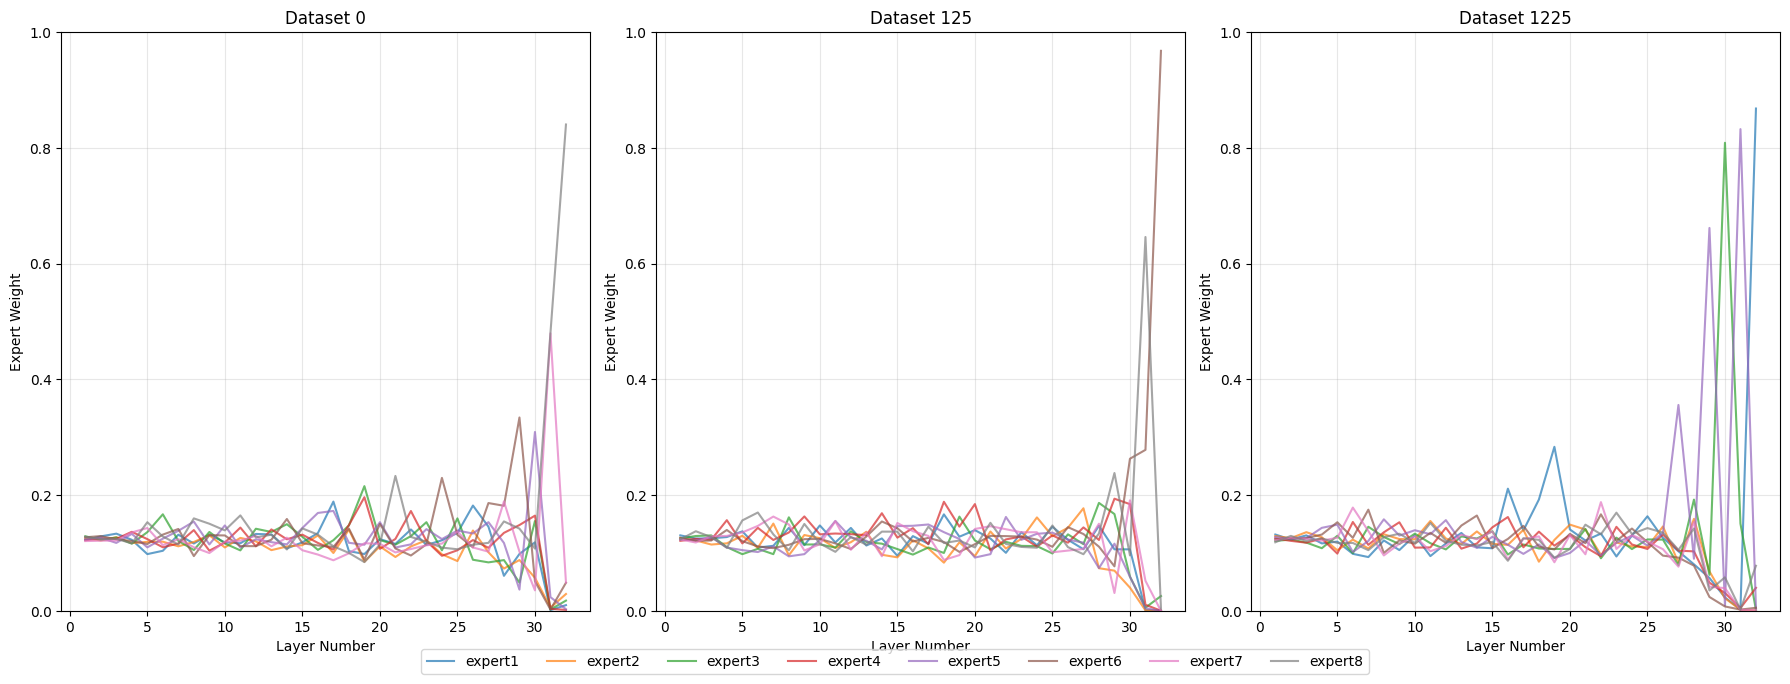

In [42]:
import matplotlib.pyplot as plt
import numpy as np

seeds = [0, 125,1225]
experts_name = [f'expert{i+1}'for i in range(seed_data_l[0]['weights'].shape[1])]

num_seeds = len(seed_paths)
num_layers = 32
num_experts = len(experts_name)

# 创建颜色映射
colors = plt.cm.tab10.colors[:num_experts]

# 创建画布和子图
fig, axs = plt.subplots(1, num_seeds, figsize=(18, 7))
axs = axs.flatten()

# 绘制每个数据集
for idx, (ax, data) in enumerate(zip(axs, seed_data_l)):
    # 绘制专家权重曲线
    for expert_idx in range(num_experts):
        ax.plot(range(1, num_layers+1), 
                data['weights'][:, expert_idx],
                color=colors[expert_idx],
                linewidth=1.5,
                alpha=0.7,
                label=f'{experts_name[expert_idx]}' if idx == 0 else "")
    
    # 设置图表属性
    ax.set_title(f'Dataset {seeds[idx]}', fontsize=12)
    ax.set_xlabel('Layer Number', fontsize=10)
    ax.set_ylabel('Expert Weight', fontsize=10)
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1)  # 适当扩大y轴范围

# 添加公共图例
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, 
           loc='lower center', 
           ncol=8,
           fontsize=10,
           bbox_to_anchor=(0.5, 0.02))

# 调整布局
plt.tight_layout()
plt.subplots_adjust(bottom=0.12)
plt.show()

In [43]:
# 对每个数据集求32层均值，
import matplotlib.pyplot as plt
import numpy as np

seed_data_stats = []
for data in seed_data_l:
    
    # 计算各专家的层平均权重
    expert_means = np.mean(data['weights'], axis=0)
    
    seed_data_stats.append({
        'expert_means': expert_means,
    })

MoE_seed_data_stats = seed_data_stats

In [44]:
MoE_seed_data_stats

[{'expert_means': array([0.11598068, 0.10475668, 0.11873897, 0.12040539, 0.12615092,
         0.12718801, 0.12392763, 0.1628539 ], dtype=float32)},
 {'expert_means': array([0.11755779, 0.10844897, 0.11296055, 0.13072947, 0.11158007,
         0.15757486, 0.12030277, 0.14084908], dtype=float32)},
 {'expert_means': array([0.14400195, 0.1111284 , 0.13691276, 0.11146402, 0.16108471,
         0.111507  , 0.10972396, 0.11415536], dtype=float32)}]

In [45]:
seed_data_stats[2]['expert_means'].sum()

np.float32(0.9999782)

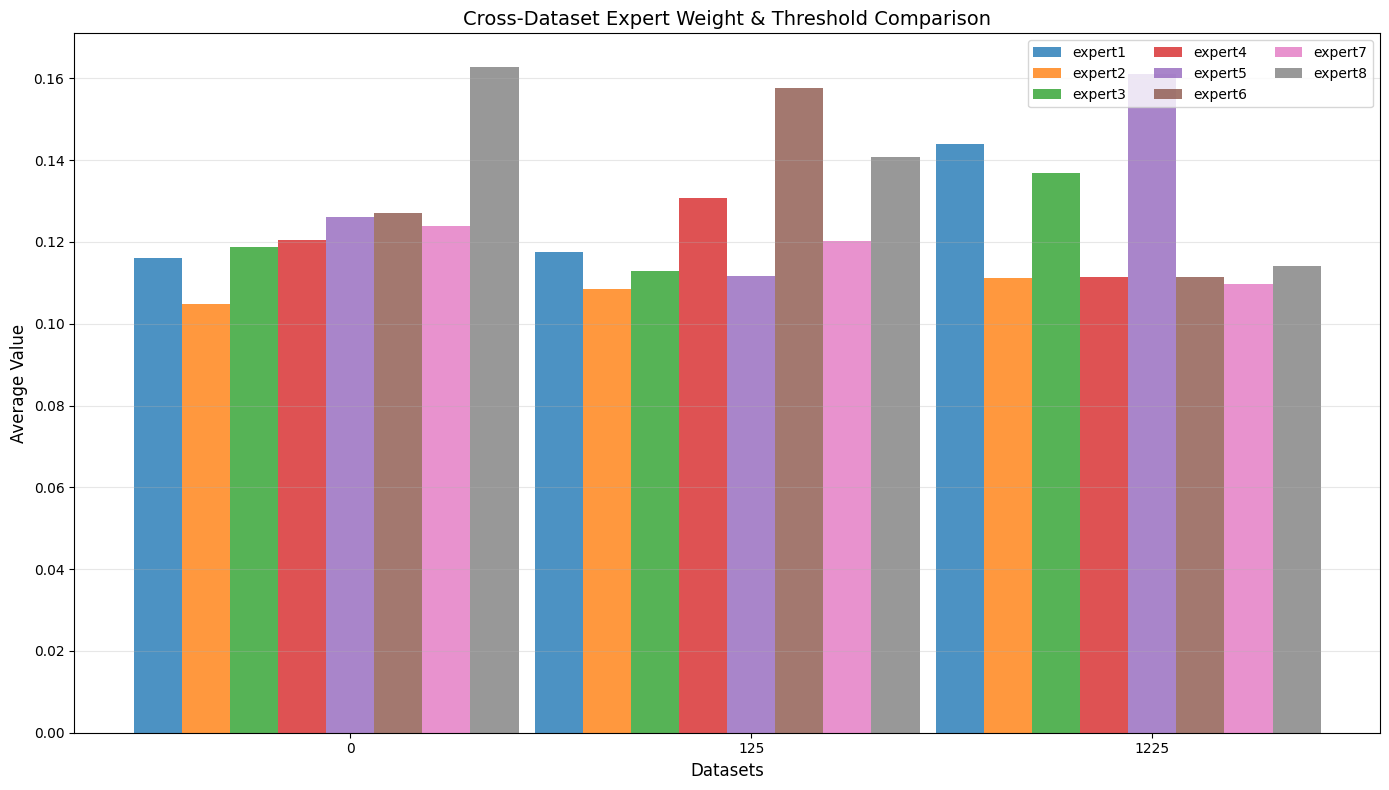

In [46]:
# 可视化设置
colors = plt.cm.tab10.colors[:num_experts]

x = np.arange(num_seeds)  # 数据集位置
width = 0.12  # 柱状图宽度

# 创建画布
fig, ax = plt.subplots(figsize=(14, 8))

# 绘制每个专家的柱状图
for expert_idx in range(num_experts):
    # 获取所有数据集当前专家的均值
    expert_values = [ds['expert_means'][expert_idx] for ds in seed_data_stats]
    
    # 计算柱状图位置偏移
    offset = width * (expert_idx - num_experts//2)
    
    ax.bar(x + offset, 
           expert_values, 
           width=width,
           color=colors[expert_idx],
           alpha=0.8,
           label=f'{experts_name[expert_idx]}')

# 图表装饰
ax.set_title('Cross-Dataset Expert Weight & Threshold Comparison', fontsize=14)
ax.set_xlabel('Datasets', fontsize=12)
ax.set_ylabel('Average Value', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(seeds)
ax.grid(True, axis='y', alpha=0.3)
ax.legend(loc='upper right', ncol=3)


plt.tight_layout()
plt.show()

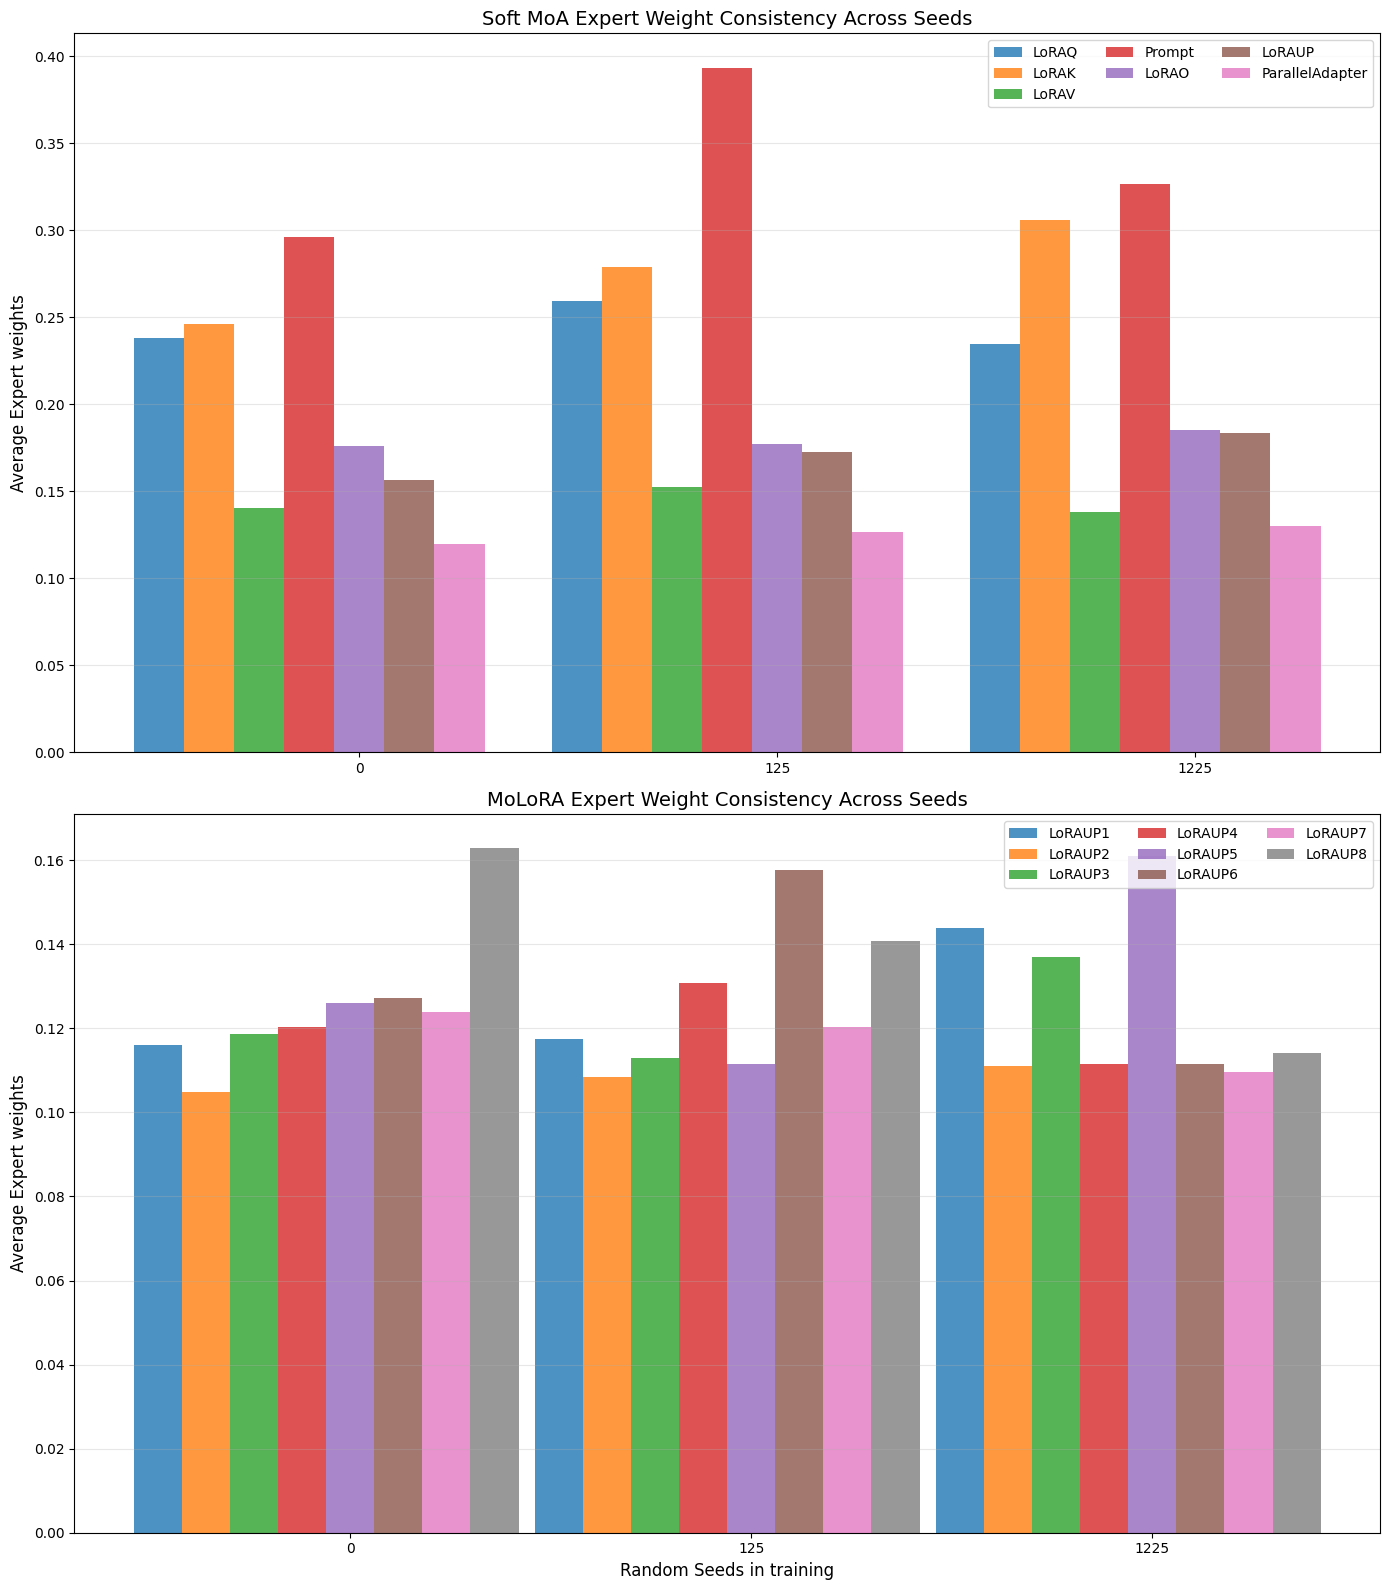

In [47]:
# 不同seeds，soft moa 和 MoLoRA 权重的layer均值 对比

seeds = [0, 125,1225]
moa_experts_name = soft_moa_experts.split()
moa_num_experts = len(moa_experts_name)

moe_experts_name = [f'LoRAUP{i+1}'for i in range(MoE_seed_data_stats[0]['expert_means'].shape[0])]
moe_num_experts = len(moe_experts_name)

num_seeds = len(seed_paths)
num_layers = 32

# 可视化设置
moa_colors = plt.cm.tab10.colors[:moa_num_experts]

x = np.arange(num_seeds)  # 数据集位置
width = 0.12  # 柱状图宽度

# 创建画布
fig, axs = plt.subplots(2, 1, figsize=(14, 16))
axs = axs.flatten()

ax1 = axs[0]
# 绘制每个专家的柱状图
for expert_idx in range(moa_num_experts):
    # 获取所有数据集当前专家的均值
    moa_expert_values = [ds['expert_means'][expert_idx] for ds in MoA_seed_data_stats]
    
    # 计算柱状图位置偏移
    offset = width * (expert_idx - num_experts//2)
    
    ax1.bar(x + offset, 
           moa_expert_values, 
           width=width,
           color=moa_colors[expert_idx],
           alpha=0.8,
           label=f'{moa_experts_name[expert_idx]}')

# 图表装饰
ax1.set_title('Soft MoA Expert Weight Consistency Across Seeds', fontsize=14)
# ax1.set_xlabel('Seeds', fontsize=12)
ax1.set_ylabel('Average Expert weights', fontsize=12)
ax1.set_xticks(x)
ax1.set_xticklabels(seeds)
ax1.grid(True, axis='y', alpha=0.3)
ax1.legend(loc='upper right', ncol=3)



# 可视化设置
moe_colors = plt.cm.tab10.colors[:moe_num_experts]

x = np.arange(num_seeds)  # 数据集位置
width = 0.12  # 柱状图宽度

# 创建画布
# fig, ax = plt.subplots(figsize=(14, 8))
ax2 = axs[1]

# 绘制每个专家的柱状图
for expert_idx in range(moe_num_experts):
    # 获取所有数据集当前专家的均值
    expert_values = [ds['expert_means'][expert_idx] for ds in MoE_seed_data_stats]
    
    # 计算柱状图位置偏移
    offset = width * (expert_idx - num_experts//2)
    
    ax2.bar(x + offset, 
           expert_values, 
           width=width,
           color=moe_colors[expert_idx],
           alpha=0.8,
           label=f'{moe_experts_name[expert_idx]}')

# 图表装饰
ax2.set_title('MoLoRA Expert Weight Consistency Across Seeds', fontsize=14)
ax2.set_xlabel('Random Seeds in training', fontsize=12)
ax2.set_ylabel('Average Expert weights', fontsize=12)
ax2.set_xticks(x)
ax2.set_xticklabels(seeds)
ax2.grid(True, axis='y', alpha=0.3)
ax2.legend(loc='upper right', ncol=3)


plt.tight_layout()
plt.savefig('seeds_average.pdf', bbox_inches='tight', dpi=350)
plt.show()

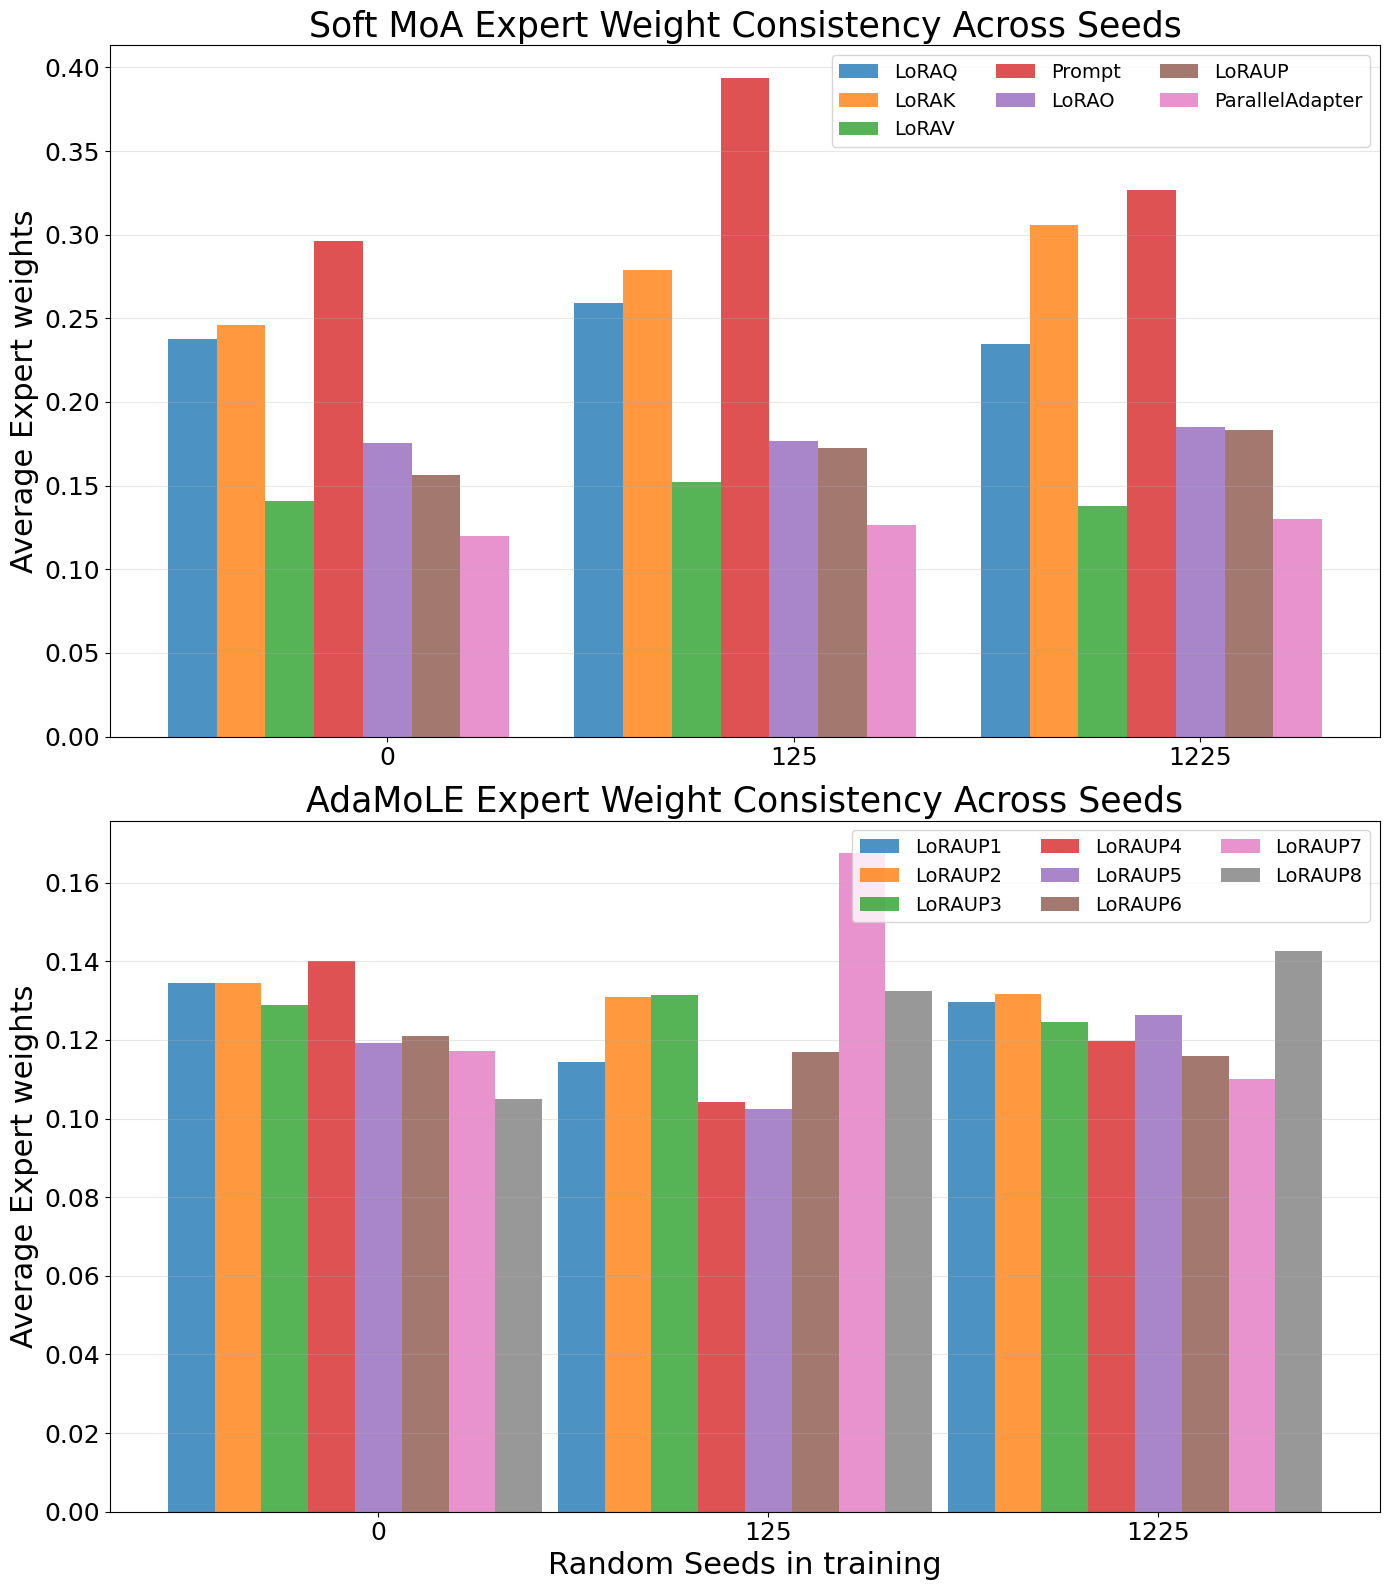

In [55]:
# 不同seeds，soft moa 和 Adamole 权重的layer均值 对比

seeds = [0, 125,1225]
moa_experts_name = soft_moa_experts.split()
moa_num_experts = len(moa_experts_name)

moe_experts_name = [f'LoRAUP{i+1}'for i in range(AdaMolE_seed_data_stats[0]['expert_means'].shape[0])]
moe_num_experts = len(moe_experts_name)

num_seeds = len(seed_paths)
num_layers = 32

# 可视化设置
moa_colors = plt.cm.tab10.colors[:moa_num_experts]

x = np.arange(num_seeds)  # 数据集位置
width = 0.12  # 柱状图宽度

# 创建画布
fig, axs = plt.subplots(2, 1, figsize=(14, 16))
axs = axs.flatten()

ax1 = axs[0]
# 绘制每个专家的柱状图
for expert_idx in range(moa_num_experts):
    # 获取所有数据集当前专家的均值
    moa_expert_values = [ds['expert_means'][expert_idx] for ds in MoA_seed_data_stats]
    
    # 计算柱状图位置偏移
    offset = width * (expert_idx - num_experts//2)
    
    ax1.bar(x + offset, 
           moa_expert_values, 
           width=width,
           color=moa_colors[expert_idx],
           alpha=0.8,
           label=f'{moa_experts_name[expert_idx]}')

# 图表装饰
ax1.set_title('Soft MoA Expert Weight Consistency Across Seeds', fontsize=25)
# ax1.set_xlabel('Seeds', fontsize=12)
ax1.set_ylabel('Average Expert weights', fontsize=22)
ax1.set_xticks(x)
ax1.set_xticklabels(seeds)
ax1.tick_params(axis='both', labelsize=18)
ax1.grid(True, axis='y', alpha=0.3)
ax1.legend(loc='upper right', ncol=3, fontsize=14)



# 可视化设置
moe_colors = plt.cm.tab10.colors[:moe_num_experts]

x = np.arange(num_seeds)  # 数据集位置
width = 0.12  # 柱状图宽度

# 创建画布
# fig, ax = plt.subplots(figsize=(14, 8))
ax2 = axs[1]

# 绘制每个专家的柱状图
for expert_idx in range(moe_num_experts):
    # 获取所有数据集当前专家的均值
    expert_values = [ds['expert_means'][expert_idx] for ds in AdaMolE_seed_data_stats]
    
    # 计算柱状图位置偏移
    offset = width * (expert_idx - num_experts//2)
    
    ax2.bar(x + offset, 
           expert_values, 
           width=width,
           color=moe_colors[expert_idx],
           alpha=0.8,
           label=f'{moe_experts_name[expert_idx]}')

# 图表装饰
ax2.set_title('AdaMoLE Expert Weight Consistency Across Seeds', fontsize=25)
ax2.set_xlabel('Random Seeds in training', fontsize=22)
ax2.set_ylabel('Average Expert weights', fontsize=22)
ax2.set_xticks(x)
ax2.set_xticklabels(seeds)
ax2.tick_params(axis='both', labelsize=18)
ax2.grid(True, axis='y', alpha=0.3)
ax2.legend(loc='upper right', ncol=3, fontsize=14)


plt.tight_layout()
plt.savefig('seeds_average_AdaMoLE.pdf', bbox_inches='tight', dpi=350)
plt.show()

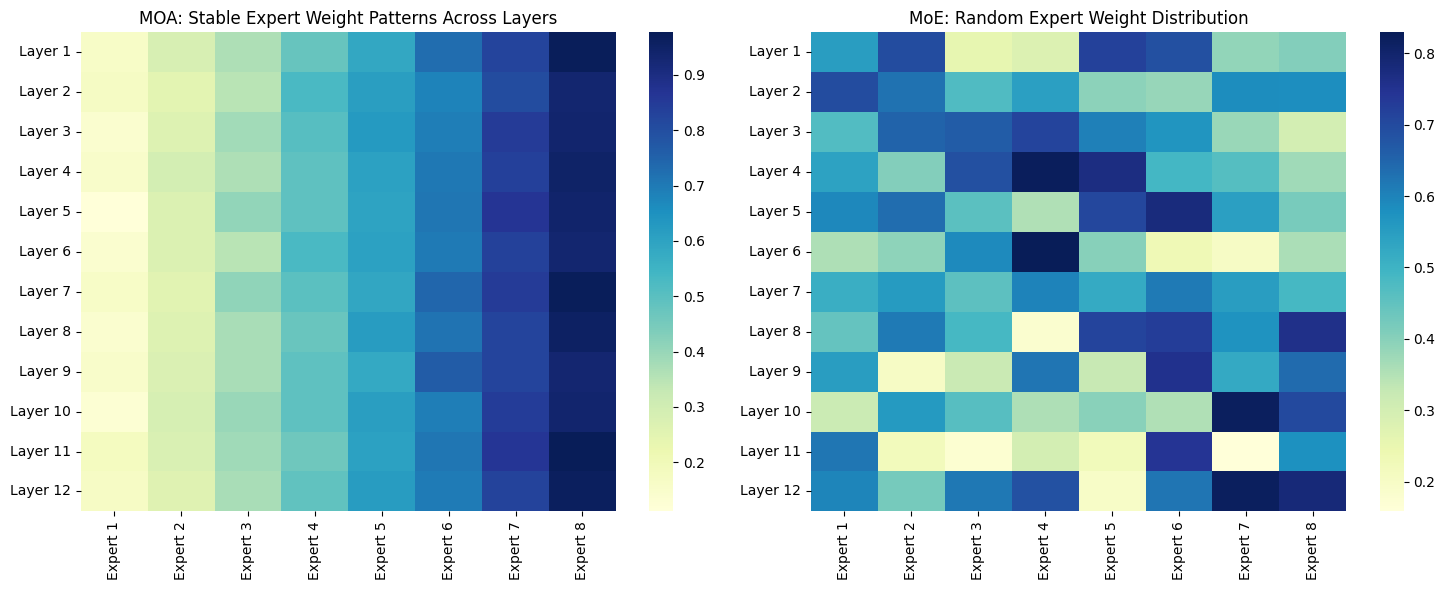

In [111]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 moa_weights 和 moe_weights 是形状为 (num_seeds, num_layers, num_experts) 的数组
# 示例数据生成
num_seeds, num_layers, num_experts = 3, 12, 8
moa_weights = np.random.rand(num_seeds, num_layers, num_experts) * 0.1 + np.tile(np.linspace(0.1, 0.9, num_experts), (num_seeds, num_layers, 1))  # 人为构造有模式的MOA权重
moe_weights = np.random.rand(num_seeds, num_layers, num_experts)  # 完全随机的MoE权重

# MOA热力图
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.heatmap(
    moa_weights.mean(axis=0),  # 不同种子间的层-专家权重均值
    cmap="YlGnBu",
    xticklabels=[f"Expert {i+1}" for i in range(num_experts)],
    yticklabels=[f"Layer {i+1}" for i in range(num_layers)]
)
plt.title("MOA: Stable Expert Weight Patterns Across Layers")

# MoE热力图
plt.subplot(1, 2, 2)
sns.heatmap(
    moe_weights.mean(axis=0),
    cmap="YlGnBu",
    xticklabels=[f"Expert {i+1}" for i in range(num_experts)],
    yticklabels=[f"Layer {i+1}" for i in range(num_layers)]
)
plt.title("MoE: Random Expert Weight Distribution")

plt.tight_layout()
plt.show()

# soft moa 和 Molora 热力图

/tmp/ipykernel_3205436/1936295779.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # 为颜色条留出空间


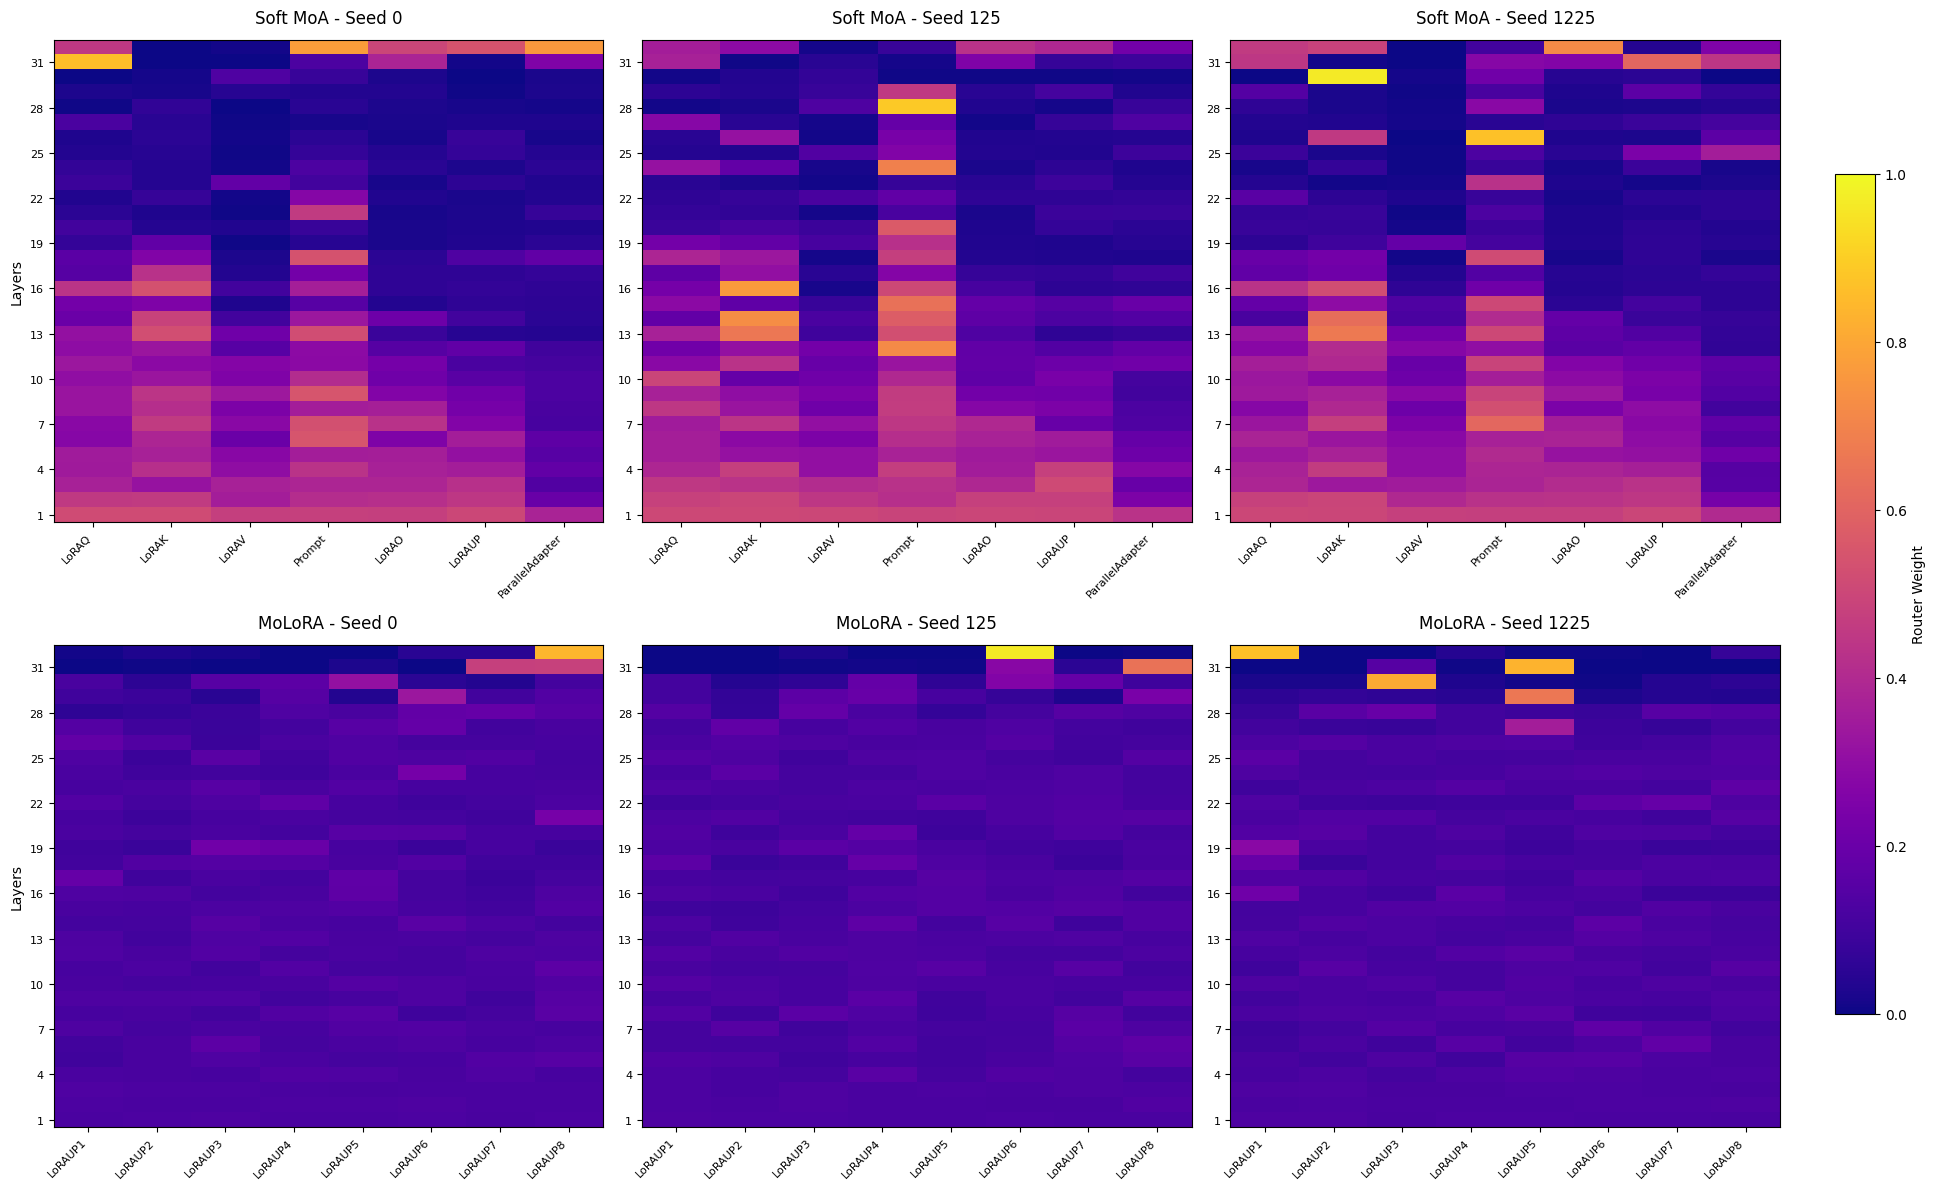

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# 假设数据准备（需替换为真实数据）
num_layers = 32
seeds = [0, 125, 1225]
moa_experts_name = soft_moa_experts.split()
moa_num_experts = len(moa_experts_name)
moe_experts_name = [f'LoRAUP{i+1}'for i in range(seed_data_MoE[0]['weights'].shape[1])]
moe_num_experts = len(moe_experts_name)
# 创建画布和子图 (2行3列)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 统一颜色范围（根据实际数据调整）
# vmin = min(np.min(seed_data_MoA), np.min(seed_data_MoE))
# vmax = max(np.max(seed_data_MoA), np.max(seed_data_MoE))
vmin = 0
vmax = 1 

# 绘制MoA行
for seed_idx in range(3):
    ax = axes[0, seed_idx]
    data = seed_data_MoA[seed_idx]  # 形状应为 (32, num_experts)
    # print(data['weights'].shape)
    # 绘制热力图
    im = ax.imshow(data['weights'], 
                #    cmap='viridis', 
                   cmap='plasma', 
                #    cmap='YlGnBu', 
                   aspect='auto',
                   vmin=vmin,
                   vmax=vmax,
                   origin='lower',
                #    interpolation='nearest' # 抗锯齿插值
                   )
    
    # 设置坐标轴
    ax.set_title(f'Soft MoA - Seed {seeds[seed_idx]}', fontsize=12, pad=12)
    # ax.set_xlabel('Experts', fontsize=10)
    if seed_idx == 0:
        ax.set_ylabel('Layers', fontsize=10)
    
    # 设置刻度标签
    ax.set_xticks(np.arange(len(moa_experts_name)))
    ax.set_xticklabels(moa_experts_name, rotation=45, ha='right', fontsize=8)
    ax.set_yticks(np.arange(0, num_layers, 3))
    ax.set_yticklabels(np.arange(1, num_layers+1, 3), fontsize=8)

# 绘制MOE行
for seed_idx in range(3):
    ax = axes[1, seed_idx]
    data = seed_data_MoE[seed_idx]  # 形状应为 (32, num_experts)
    
    # 绘制热力图
    im = ax.imshow(data['weights'], 
                   cmap='plasma', 
                   aspect='auto',
                   vmin=vmin,
                   vmax=vmax,
                   origin='lower',
                #    interpolation='nearest'
                   )
    
    # 设置坐标轴
    ax.set_title(f'MoLoRA - Seed {seeds[seed_idx]}', fontsize=12, pad=12)
    # ax.set_xlabel('Experts', fontsize=10)
    if seed_idx == 0:
        ax.set_ylabel('Layers', fontsize=10)
    
    # 设置刻度标签
    ax.set_xticks(np.arange(len(moe_experts_name)))
    ax.set_xticklabels(moe_experts_name, rotation=45, ha='right', fontsize=8)
    ax.set_yticks(np.arange(0, num_layers, 3))
    ax.set_yticklabels(np.arange(1, num_layers+1, 3), fontsize=8)

# 添加共享颜色条
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # 调整位置参数
fig.colorbar(im, cax=cax, label='Router Weight')

# 优化布局
plt.tight_layout(rect=[0, 0, 0.9, 1])  # 为颜色条留出空间
plt.savefig('seeds_heatmap_MoLoRA.pdf', bbox_inches='tight', dpi=350)
plt.show()

# soft moa 和 adamole 热力图

/tmp/ipykernel_1367262/2808197728.py:87: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # 为颜色条留出空间


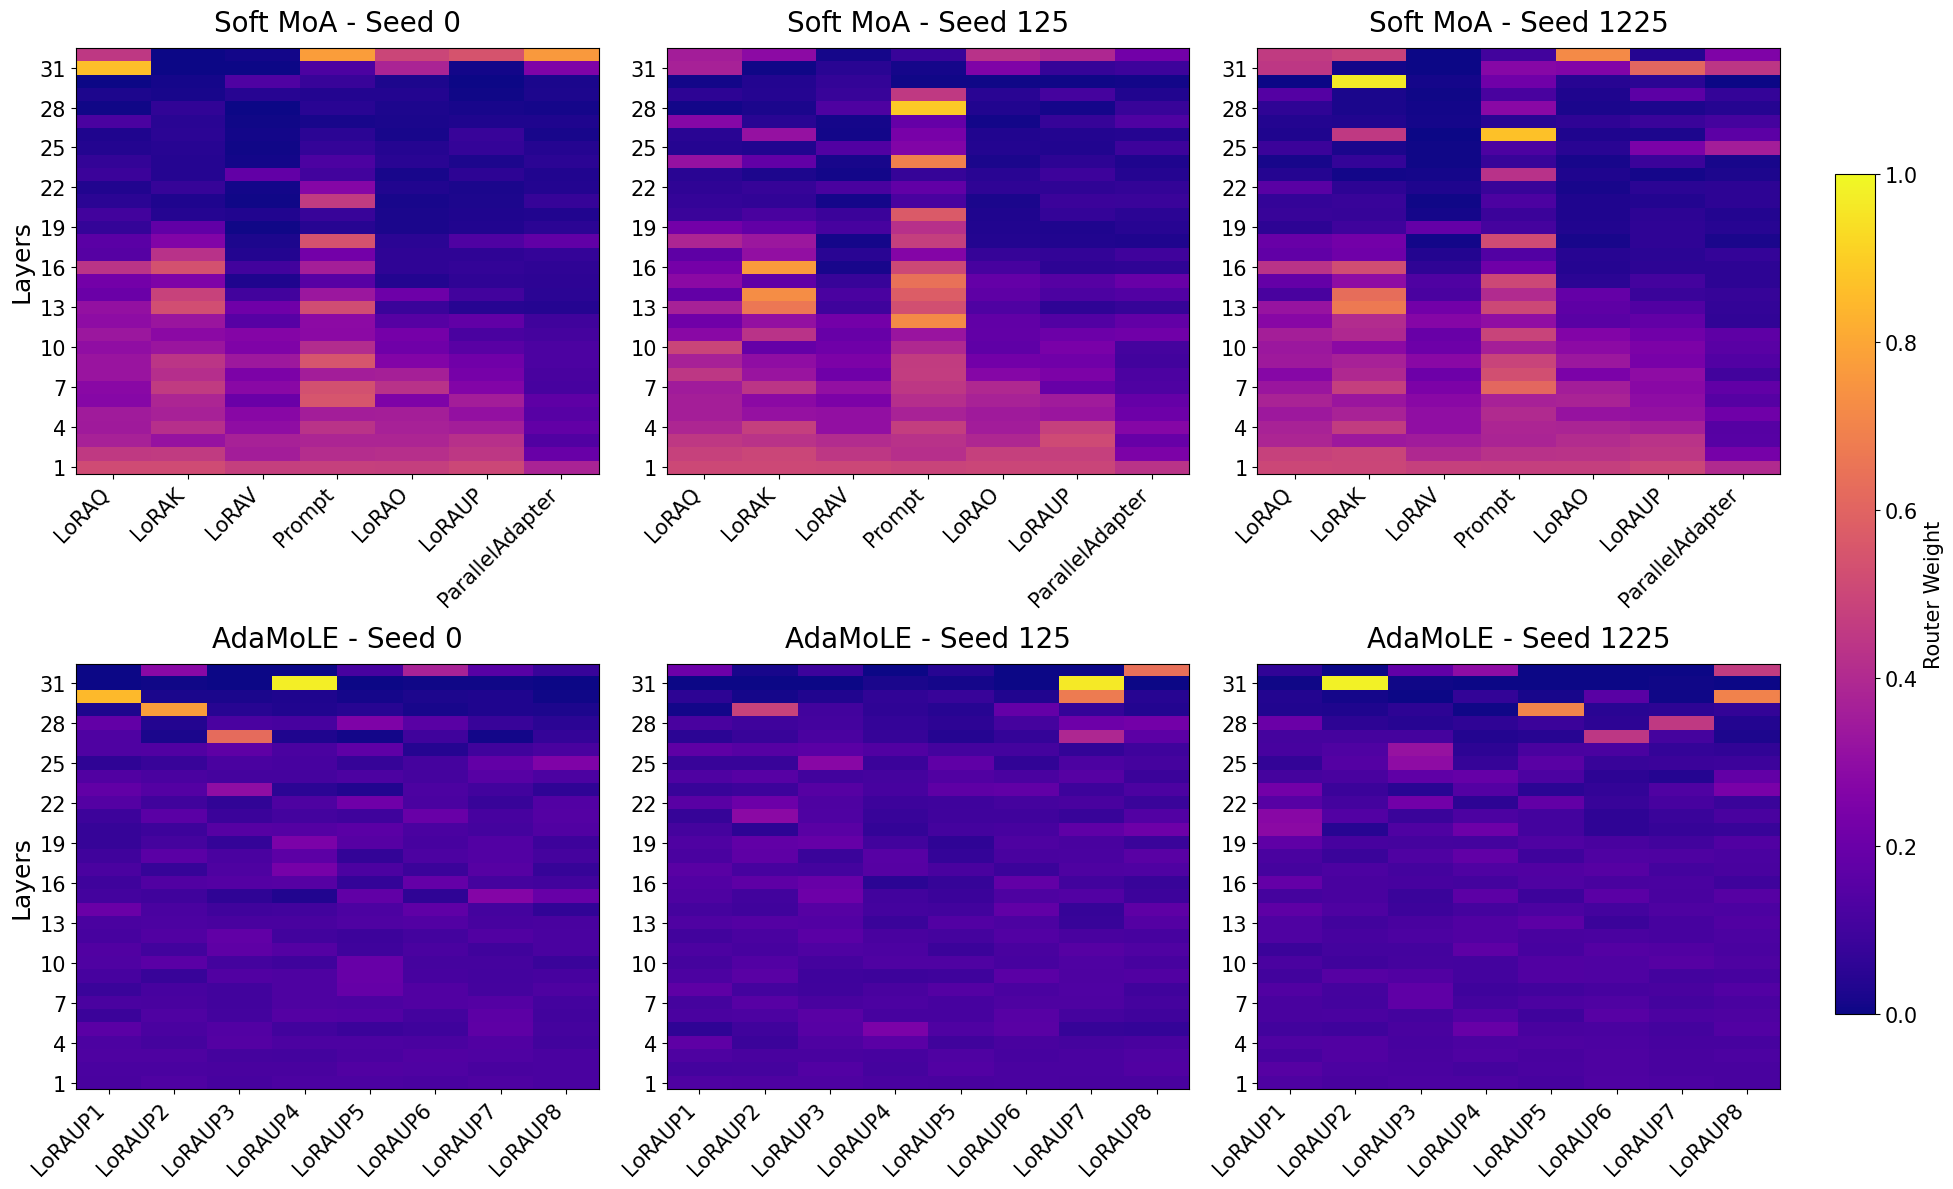

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 假设数据准备（需替换为真实数据）
num_layers = 32
seeds = [0, 125, 1225]
moa_experts_name = soft_moa_experts.split()
moa_num_experts = len(moa_experts_name)

seed_data_MoE = seed_data_AdaMoLE
moe_experts_name = [f'LoRAUP{i+1}'for i in range(seed_data_MoE[0]['weights'].shape[1])]
moe_num_experts = len(moe_experts_name)
# 创建画布和子图 (2行3列)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 统一颜色范围（根据实际数据调整）
# vmin = min(np.min(seed_data_MoA), np.min(seed_data_MoE))
# vmax = max(np.max(seed_data_MoA), np.max(seed_data_MoE))
vmin = 0
vmax = 1 

# 绘制MoA行
for seed_idx in range(3):
    ax = axes[0, seed_idx]
    data = seed_data_MoA[seed_idx]  # 形状应为 (32, num_experts)
    # print(data['weights'].shape)
    # 绘制热力图
    im = ax.imshow(data['weights'], 
                #    cmap='viridis', 
                   cmap='plasma', 
                #    cmap='YlGnBu', 
                   aspect='auto',
                   vmin=vmin,
                   vmax=vmax,
                   origin='lower',
                #    interpolation='nearest' # 抗锯齿插值
                   )
    
    # 设置坐标轴
    ax.set_title(f'Soft MoA - Seed {seeds[seed_idx]}', fontsize=20, pad=12)
    # ax.set_xlabel('Experts', fontsize=10)
    if seed_idx == 0:
        ax.set_ylabel('Layers', fontsize=18)
    
    # 设置刻度标签
    ax.set_xticks(np.arange(len(moa_experts_name)))
    ax.set_xticklabels(moa_experts_name, rotation=45, ha='right', fontsize=15)
    ax.set_yticks(np.arange(0, num_layers, 3))
    ax.set_yticklabels(np.arange(1, num_layers+1, 3), fontsize=15)

# 绘制MOE行
for seed_idx in range(3):
    ax = axes[1, seed_idx]
    data = seed_data_MoE[seed_idx]  # 形状应为 (32, num_experts)
    
    # 绘制热力图
    im = ax.imshow(data['weights'], 
                   cmap='plasma', 
                   aspect='auto',
                   vmin=vmin,
                   vmax=vmax,
                   origin='lower',
                #    interpolation='nearest'
                   )
    
    # 设置坐标轴
    ax.set_title(f'AdaMoLE - Seed {seeds[seed_idx]}', fontsize=20, pad=12)
    # ax.set_xlabel('Experts', fontsize=10)
    if seed_idx == 0:
        ax.set_ylabel('Layers', fontsize=18)
    
    # 设置刻度标签
    ax.set_xticks(np.arange(len(moe_experts_name)))
    ax.set_xticklabels(moe_experts_name, rotation=45, ha='right', fontsize=15)
    ax.set_yticks(np.arange(0, num_layers, 3))
    ax.set_yticklabels(np.arange(1, num_layers+1, 3), fontsize=15)

# 添加共享颜色条
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # 调整位置参数
cbar = fig.colorbar(im, cax=cax, label='Router Weight')
cbar.set_label(label='Router Weight', fontsize=15)
cbar.ax.tick_params(labelsize=15)


# 优化布局
plt.tight_layout(rect=[0, 0, 0.9, 1])  # 为颜色条留出空间
plt.savefig('seeds_heatmap_AdaMoLE.pdf', bbox_inches='tight', dpi=350)
plt.show()